<a href="https://colab.research.google.com/github/sanjaydbhandari/Leaf_Disease_detection/blob/main/Leaf_Disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this file before testing the TYLCV images

import os

if not os.path.exists("TYLCV"):
  os.makedirs("TYLCV/TYLCV_images")
  os.makedirs("TYLCV/TYLCV_Output/correct")
  os.makedirs("TYLCV/TYLCV_Output/incorrect")

if not os.path.exists("TTS"):
  os.makedirs("TTS/TTS_images")
  os.makedirs("TTS/TTS_Output/correct")
  os.makedirs("TTS/TTS_Output/incorrect")

if not os.path.exists("TMV"):
  os.makedirs("TMV/TMV_images")
  os.makedirs("TMV/TMV_Output/correct")
  os.makedirs("TMV/TMV_Output/incorrect")

if not os.path.exists("TSLS"):
  os.makedirs("TSLS/TSLS_images")
  os.makedirs("TSLS/TSLS_Output/correct")
  os.makedirs("TSLS/TSLS_Output/incorrect")

if not os.path.exists("Master"):
  os.makedirs("Master/input_images")
  os.makedirs("Master/output_images")
  os.makedirs("Master/test_images")
  os.makedirs("Master/TMV")
  os.makedirs("Master/TSLS")
  os.makedirs("Master/TTS")
  os.makedirs("Master/TYLCV")

# New Section

In [ ]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

folder_path = r"bg"

def removeBg(folder_path, filename):
        print(f"checking: {filename}...")
        img_path = os.path.join(folder_path, filename)
        # Load the image
        image = cv2.imread(img_path)

        # img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        # img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Lab Color Space - https://en.wikipedia.org/wiki/CIELAB_color_space
        # L = img_lab[:, :, 0]
        # a = img_lab[:, :, 1]
        b = img_lab[:, :, 2]
        fig, ax = plt.subplots(1,3, figsize=(15,15))
        ax[0].imshow(b);

        # K-means clustering in opencv - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
        pixel_vals = b.flatten()
        pixel_vals = np.float32(pixel_vals)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        # Since we are interested in only actual leaf pixels, we choose 2 clusters
        # one cluster for actual leaf pixels and other for unwanted background pixels.
        K = 2
        retval, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        centers = np.uint8(centers)
        segmented_data = centers[labels.flatten()]
        segmented_image = segmented_data.reshape((b.shape))
        pixel_labels = labels.reshape(img_lab.shape[0], img_lab.shape[1])
        # apply Otsu's thresholding method to create binary image
        _, binary_image = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        # apply binary image as mask
        masked_image = cv2.bitwise_and(image, image, mask=binary_image)
        cv2_imshow(masked_image)
        return masked_image


checking: image (3).JPG...
checking: image (3).JPG...


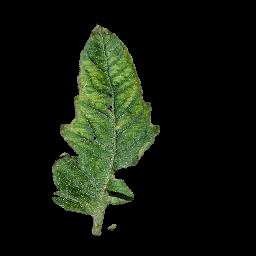

image (3).JPG has TMV
checking: image (1).JPG...
checking: image (1).JPG...


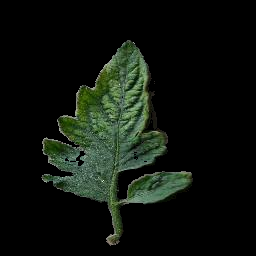

image (1).JPG has TMV
checking: image (2).JPG...
checking: image (2).JPG...


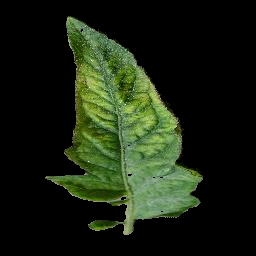

image (2).JPG has TMV


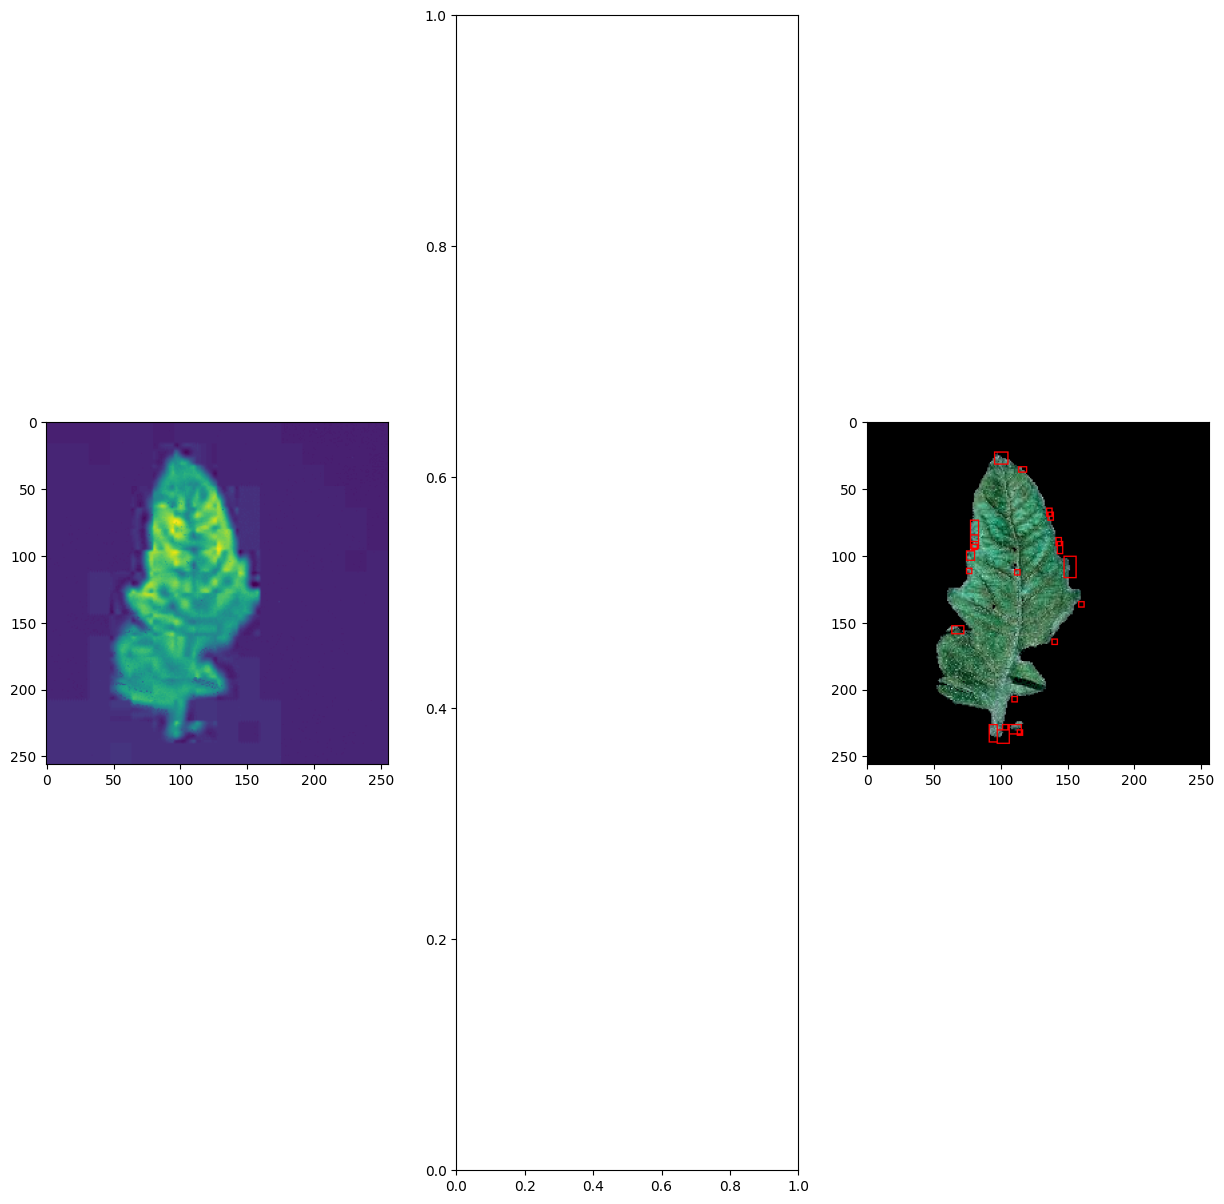

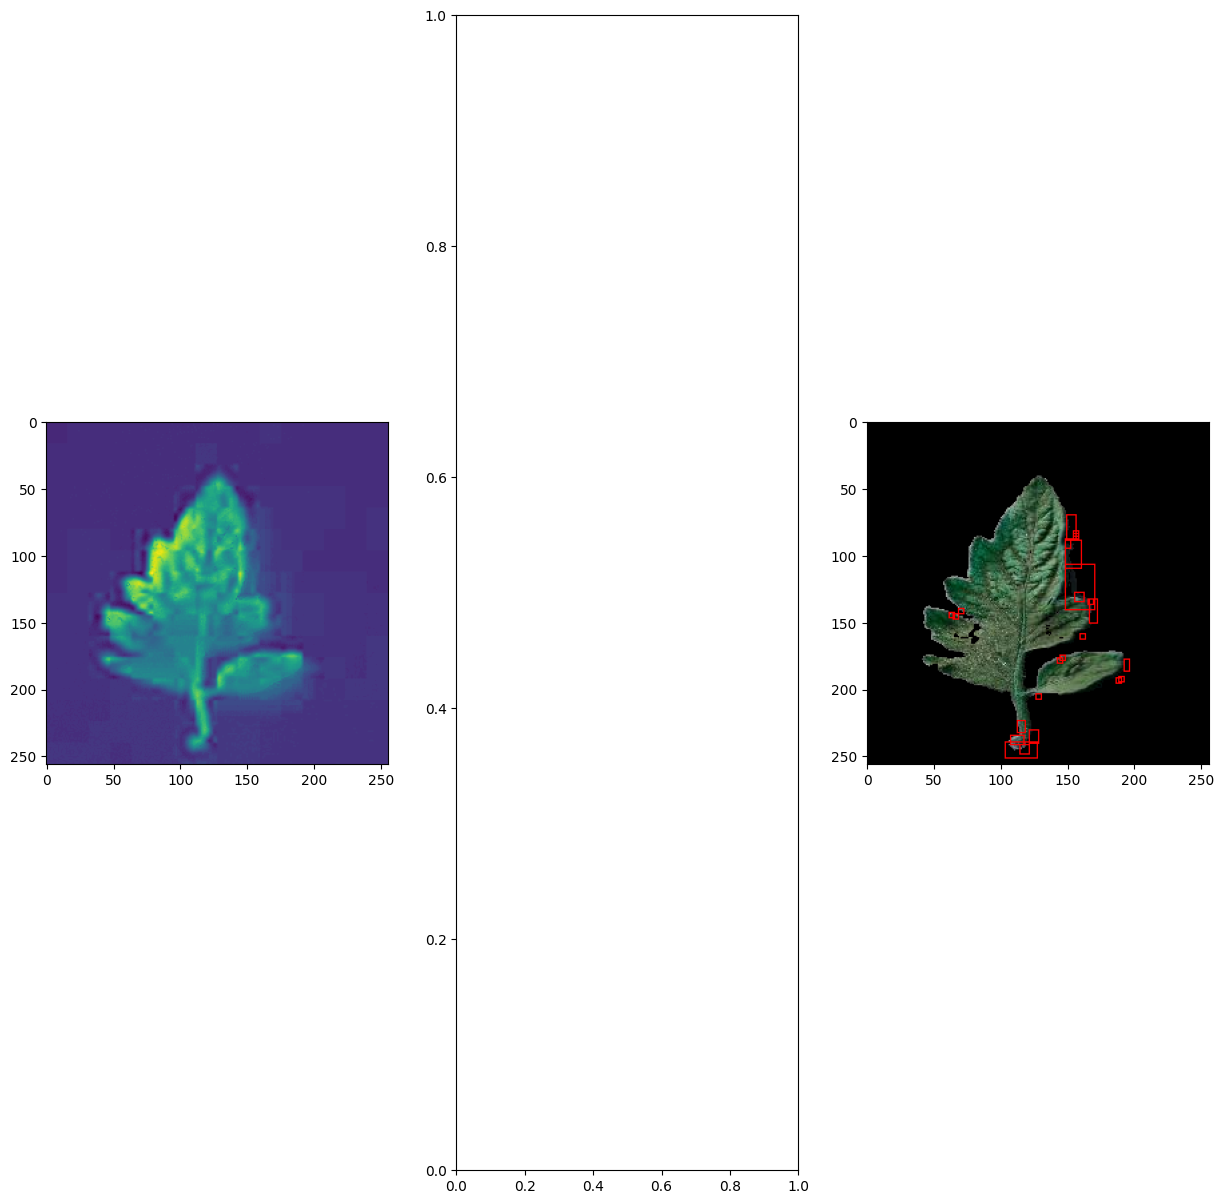

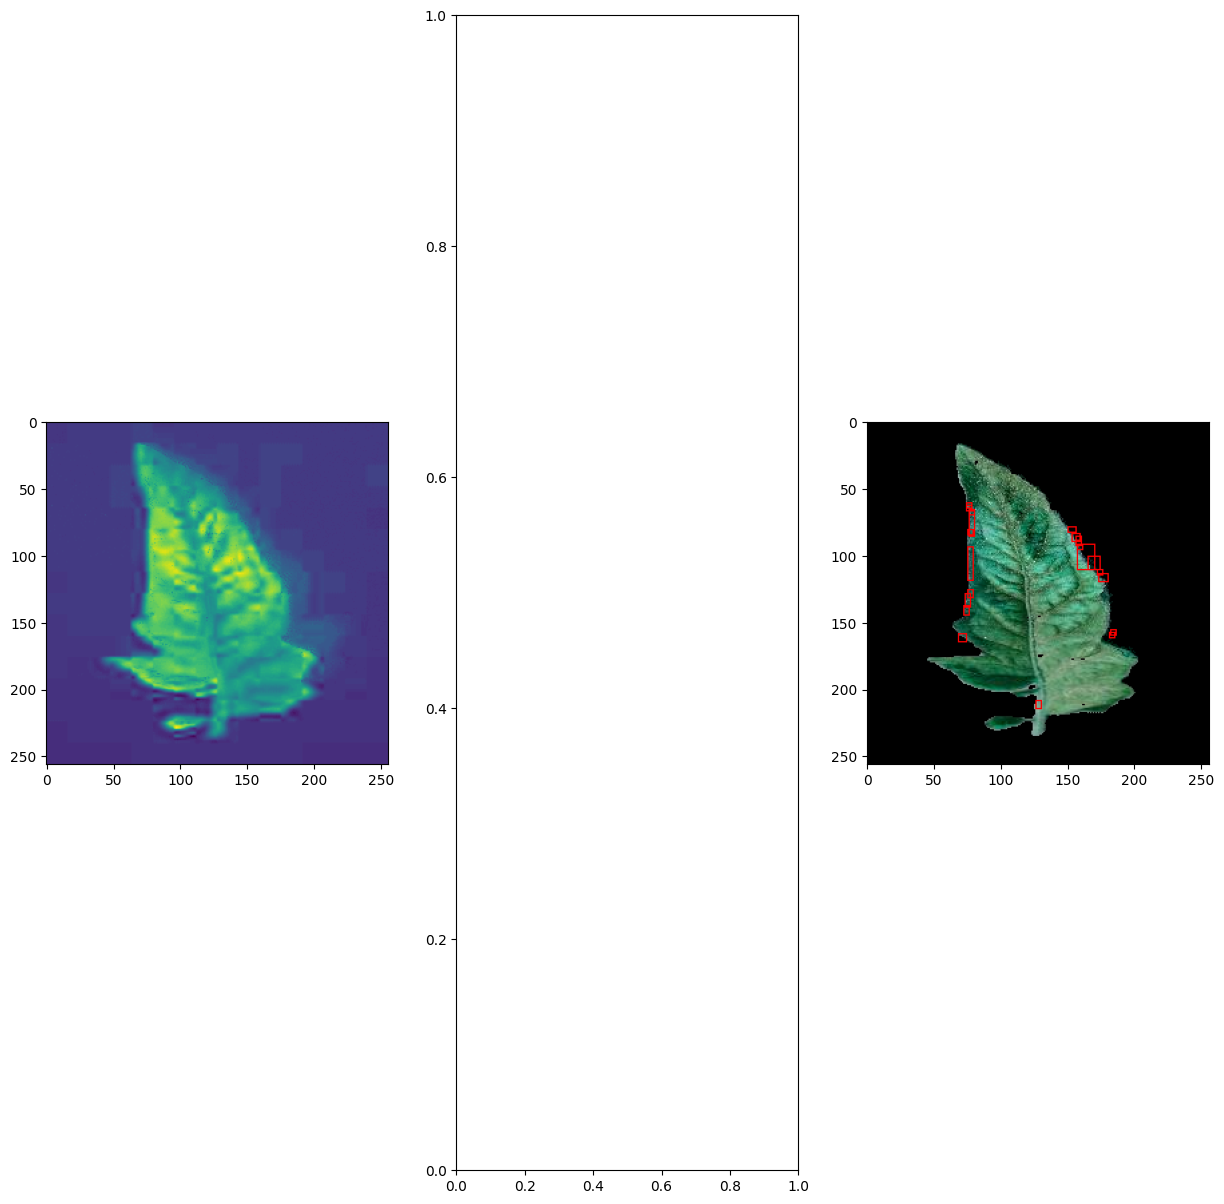

In [ ]:
# Testing TMV: Yellow or Brown
# Prediction: More than 90%
import os
import cv2
import numpy as np
import shutil

def detect_yellow(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the yellow color
    lower_yellow = np.array([44, 117, 82])
    upper_yellow = np.array([44, 255, 136])

    # Create a mask of the yellow areas
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one yellow spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (0, 0, 255), 1)
        return True
    else:
        # No brown spots were detected
        return False

def detect_brown(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define the lower and upper bounds of the brown color
    lower_brown1 = np.array([0, 20, 20])
    upper_brown1 = np.array([30, 255, 255])
    lower_brown2 = np.array([151, 20, 20])
    upper_brown2 = np.array([180, 255, 255])

    # Create masks for both brown color ranges and combine them
    mask1 = cv2.inRange(hsv, lower_brown1, upper_brown1)
    mask2 = cv2.inRange(hsv, lower_brown2, upper_brown2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        contour_list = []
        # At least one brown spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 0), 1)
            contour_list.append([x, y, w, h])
        plt.imshow(image)
        return True
    else:
        # No brown spots were detected
        return False


folder_path = r"TMV/TMV_images"
correct_folder = r"TMV/TMV_Output/correct"
incorrect_folder = r"TMV/TMV_Output/incorrect"

for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        print(f"checking: {filename}...")
        # img_path = os.path.join(folder_path, filename)
        # img = cv2.imread(img_path)
        convertedImage = removeBg(folder_path, filename)
        has_brown = detect_brown(convertedImage)
        has_yellow = detect_yellow(convertedImage)


        # Save the image in the output folder
        if has_brown or has_yellow:
            output_path = os.path.join(correct_folder, filename)
            print(f"{filename} has TMV")
            cv2.imwrite(output_path, convertedImage)
        else:
            output_path = os.path.join(incorrect_folder, filename)
            cv2.imwrite(output_path, convertedImage)

Pink for TSLS
checking: image (3).JPG...
checking: image (3).JPG...


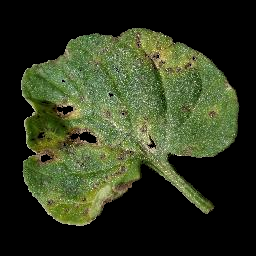

image (3).JPG has brown spots
image (3).JPG has gray spots
image (3).JPG has yellow spots
checking: image (1).JPG...
checking: image (1).JPG...


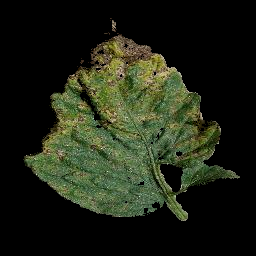

image (1).JPG has brown spots
image (1).JPG has gray spots
image (1).JPG has yellow spots
checking: image (2).JPG...
checking: image (2).JPG...


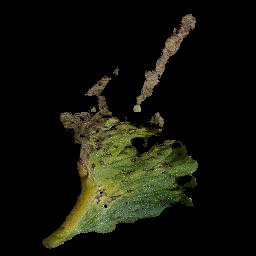

image (2).JPG has brown spots
image (2).JPG has gray spots
image (2).JPG has yellow spots


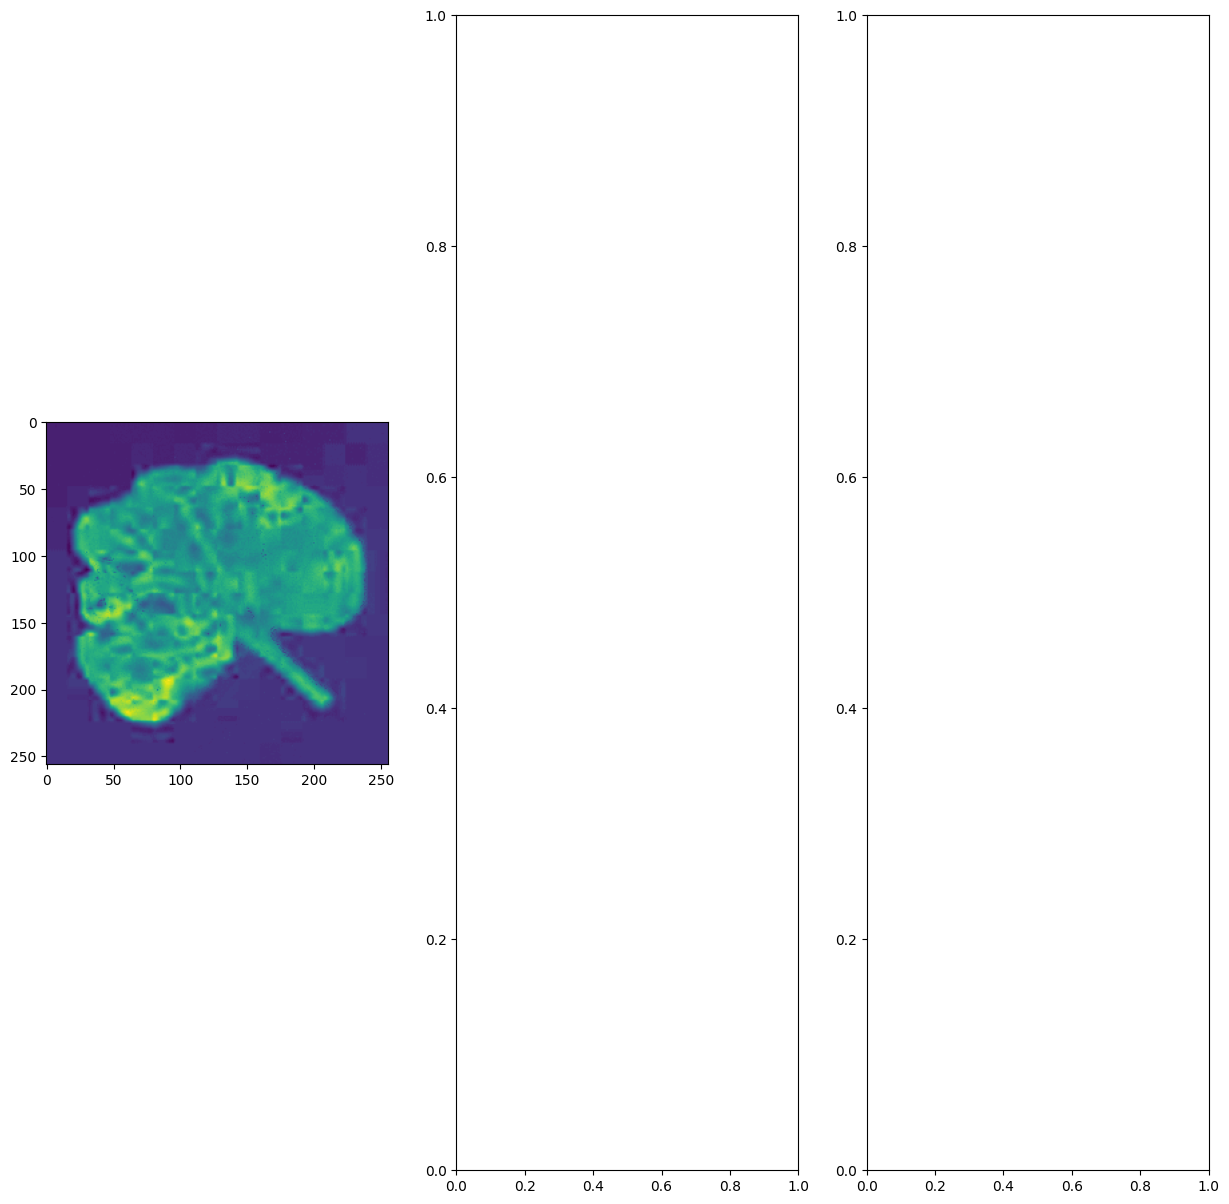

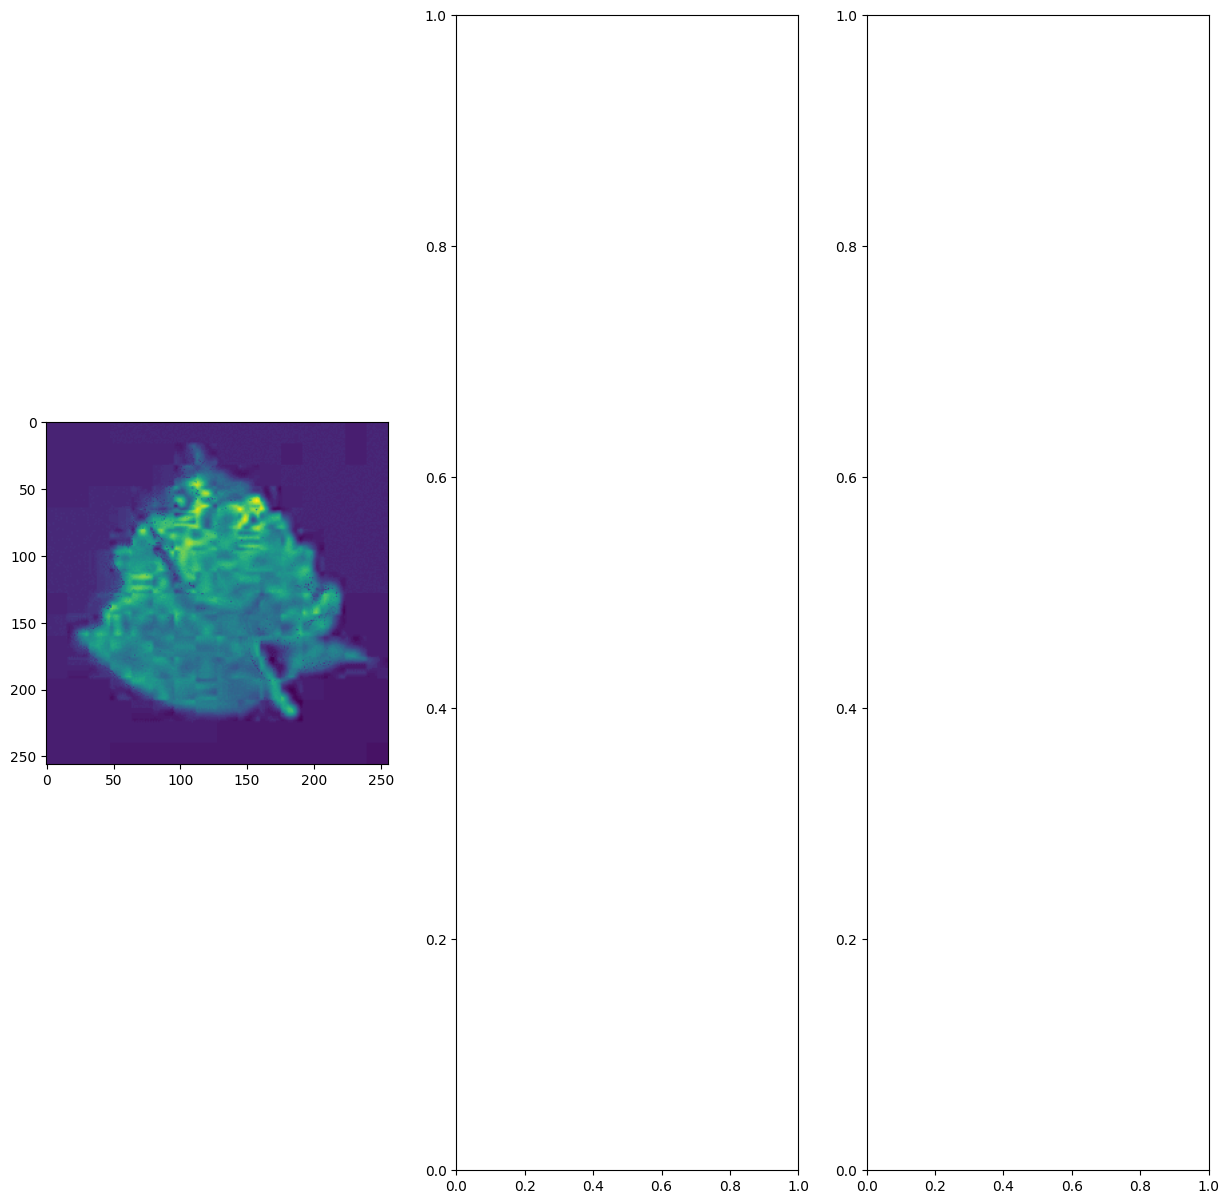

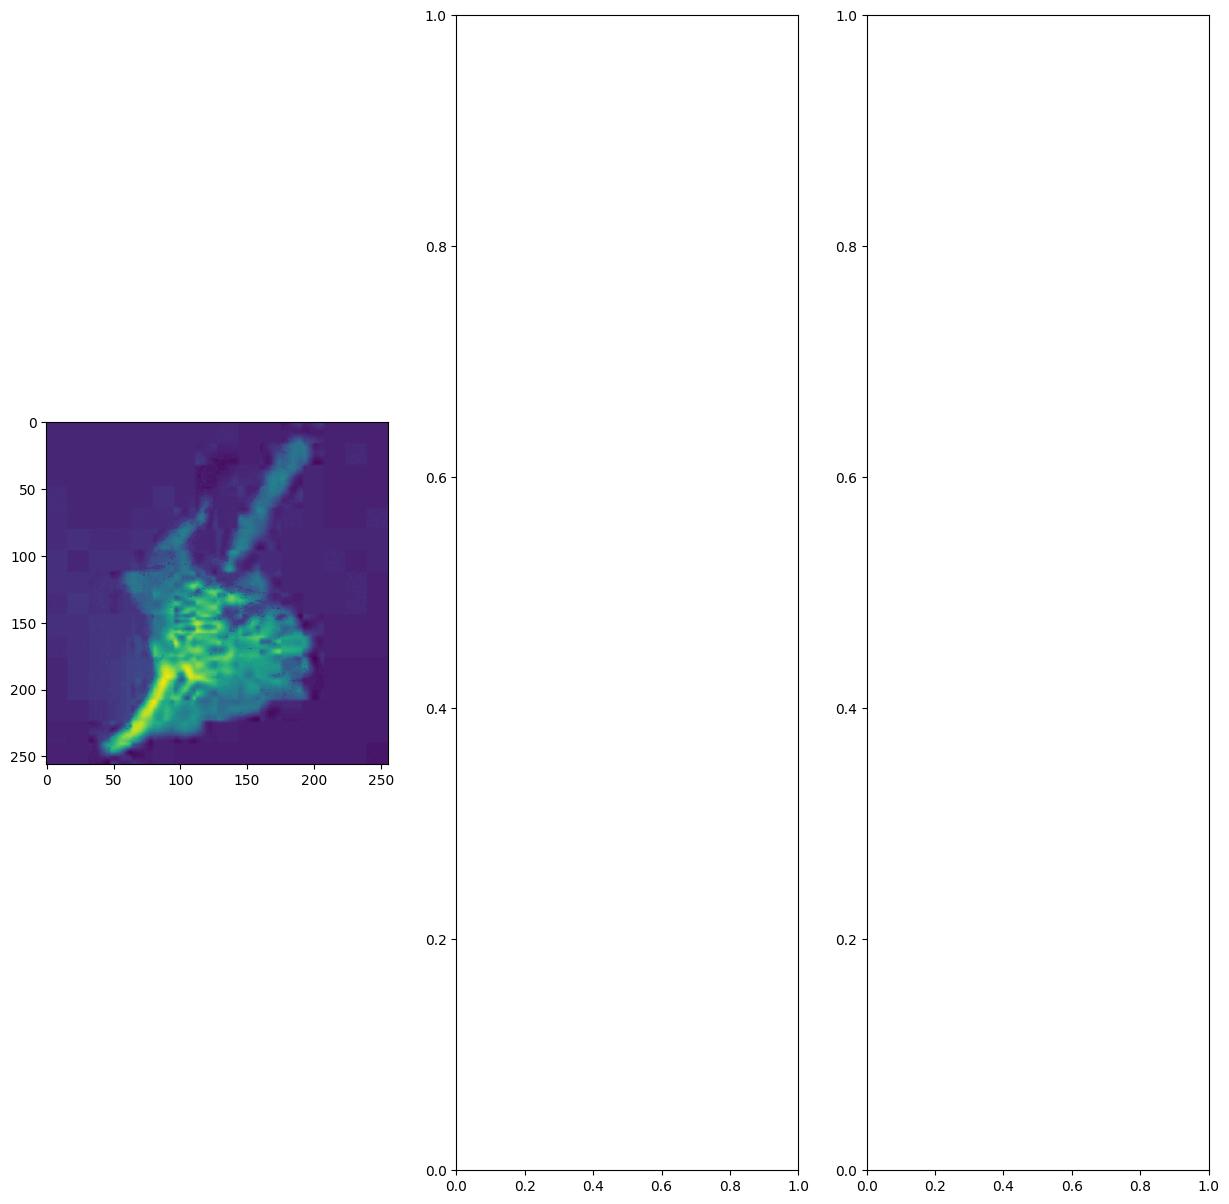

In [ ]:
# Testing TSLS: grey(center) + brown => round shape and surrounding yellow
# In this we are only checking for gray, brown color and yellow

import os
import cv2
import numpy as np
import shutil

print("Pink for TSLS")

def detect_yellow(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the light greenish yellow
    lower_yellow = np.array([20, 100, 60])
    upper_yellow = np.array([60, 255, 180])

    # Create a mask of the brown areas
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one brown spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            # cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 255, 0), 1)
        return True
    else:
        # No brown spots were detected
        return False


# It looks for gray and tan spots
def detect_gray(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the gray and tan colors
    lower_gray = np.array([0, 0, 0])
    upper_gray = np.array([180, 50, 150])
    lower_tan = np.array([0, 20, 151])
    upper_tan = np.array([180, 50, 255])

    # Create masks for gray and tan colors separately
    gray_mask = cv2.inRange(hsv, lower_gray, upper_gray)
    tan_mask = cv2.inRange(hsv, lower_tan, upper_tan)

    # Combine the masks to include both gray and tan areas
    combined_mask = cv2.bitwise_or(gray_mask, tan_mask)

    # Find contours in the combined mask
    contours, hierarchy = cv2.findContours(combined_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one gray or tan spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w // 4
            y -= h // 4
            w += w // 2
            h += h // 2
            # cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 255), 1)
        return True
    else:
        # No gray or tan spots were detected
        return False

def detect_brown(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define the lower and upper bounds of the brown color
    lower_brown1 = np.array([0, 20, 20])
    upper_brown1 = np.array([30, 255, 255])
    lower_brown2 = np.array([151, 20, 20])
    upper_brown2 = np.array([180, 255, 255])

    # Create masks for both brown color ranges and combine them
    mask1 = cv2.inRange(hsv, lower_brown1, upper_brown1)
    mask2 = cv2.inRange(hsv, lower_brown2, upper_brown2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one brown spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 0), 1)
        return True
    else:
        # No brown spots were detected
        return False

folder_path = r"TSLS/TSLS_images"
correct_folder = r"TSLS/TSLS_Output/correct"
incorrect_folder = r"TSLS/TSLS_Output/incorrect"

for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        print(f"checking: {filename}...")
        # img_path = os.path.join(folder_path, filename)
        # img = cv2.imread(img_path)
        convertedImage = removeBg(folder_path, filename)

        has_gray = detect_gray(convertedImage)
        has_brown = detect_brown(convertedImage)
        has_yellow = detect_yellow(convertedImage)

        if has_brown:
          print(f"{filename} has brown spots")

        if has_gray:
          print(f"{filename} has gray spots")

        if has_yellow:
          print(f"{filename} has yellow spots")

        # Save the image in the output folder
        if has_gray and has_brown and has_yellow:
            output_path = os.path.join(correct_folder, filename)
            cv2.imwrite(output_path, convertedImage)
        else:
            output_path = os.path.join(incorrect_folder, filename)
            cv2.imwrite(output_path, convertedImage)

Blue for TTS
checking: image (3).JPG...
checking: image (3).JPG...


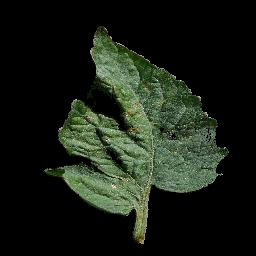

[[[132 236]]]
[[[124 216]]]
[[[135 212]]

 [[135 214]]

 [[136 215]]

 [[135 216]]

 [[136 215]]

 [[136 212]]]
[[[147 205]]

 [[147 206]]

 [[146 207]]

 [[147 208]]

 [[147 213]]

 [[146 214]]

 [[146 222]]

 [[144 224]]

 [[144 234]]

 [[143 235]]

 [[143 236]]

 [[142 237]]

 [[140 237]]

 [[140 238]]

 [[139 239]]

 [[133 239]]

 [[134 239]]

 [[135 240]]

 [[134 241]]

 [[136 241]]

 [[138 243]]

 [[143 243]]

 [[143 240]]

 [[144 239]]

 [[144 233]]

 [[145 232]]

 [[145 229]]

 [[146 228]]

 [[145 227]]

 [[146 226]]

 [[146 218]]

 [[147 217]]

 [[147 210]]

 [[148 209]]

 [[147 208]]]
[[[148 199]]

 [[148 200]]]
[[[149 195]]]
[[[189 193]]]
[[[150 192]]]
[[[150 190]]]
[[[113 185]]

 [[113 187]]

 [[114 187]]

 [[114 186]]]
[[[129 127]]

 [[129 129]]

 [[130 130]]

 [[130 131]]

 [[131 131]]

 [[132 132]]

 [[133 132]]

 [[133 131]]

 [[134 130]]

 [[134 128]]

 [[130 128]]]
[[[217 123]]]
[[[ 86 117]]

 [[ 86 119]]

 [[ 87 119]]

 [[ 88 120]]

 [[ 89 119]]

 [[ 90 119]]

 [[ 90

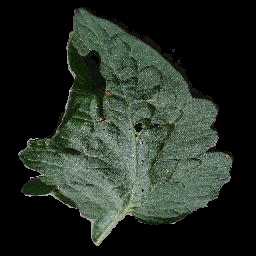

[[[122 218]]]
[[[ 77 208]]

 [[ 78 208]]]
[[[ 53 190]]

 [[ 54 190]]]
[[[ 28 180]]]
[[[ 30 179]]]
[[[225 150]]

 [[224 151]]

 [[226 153]]

 [[226 154]]

 [[229 154]]

 [[232 157]]

 [[232 158]]

 [[233 159]]

 [[233 157]]

 [[232 156]]

 [[232 155]]

 [[230 153]]

 [[230 152]]

 [[229 153]]

 [[228 152]]

 [[228 151]]

 [[226 151]]]
[[[230 155]]

 [[231 154]]

 [[232 155]]

 [[231 156]]]
[[[229 154]]

 [[230 153]]

 [[231 154]]

 [[230 155]]]
[[[226 153]]

 [[227 152]]

 [[228 152]]

 [[229 153]]

 [[228 154]]

 [[227 154]]]
[[[225 152]]

 [[226 151]]

 [[227 152]]

 [[226 153]]]
[[[215 144]]

 [[215 145]]

 [[214 146]]

 [[213 146]]

 [[213 147]]

 [[214 147]]

 [[215 148]]]
[[[216 140]]]
[[[ 29 140]]

 [[ 29 141]]

 [[ 28 142]]

 [[ 30 142]]

 [[ 30 141]]

 [[ 31 140]]]
[[[218 134]]

 [[218 136]]]
[[[216 131]]

 [[217 131]]]
[[[215 128]]

 [[216 129]]]
[[[ 57 124]]]
[[[213 122]]

 [[213 124]]

 [[212 125]]

 [[213 126]]

 [[213 123]]

 [[214 122]]]
[[[ 58 119]]]
[[[102 118]]

 [[100

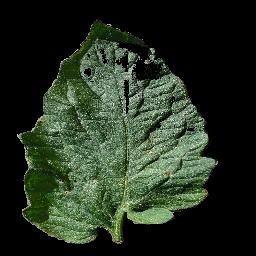

[[[112 240]]

 [[113 241]]

 [[114 241]]

 [[115 242]]

 [[116 242]]

 [[117 243]]

 [[121 243]]

 [[122 242]]

 [[122 241]]

 [[121 242]]

 [[120 241]]

 [[119 242]]

 [[118 241]]

 [[117 242]]

 [[116 241]]

 [[113 241]]]
[[[ 51 236]]]
[[[111 235]]]
[[[ 48 235]]]
[[[110 233]]]
[[[ 45 232]]

 [[ 46 232]]

 [[ 47 233]]

 [[ 46 232]]]
[[[ 43 231]]]
[[[134 223]]]
[[[ 28 221]]]
[[[125 219]]]
[[[173 215]]

 [[173 218]]

 [[174 218]]

 [[173 217]]

 [[174 216]]]
[[[177 209]]

 [[177 211]]

 [[180 211]]

 [[181 210]]

 [[182 210]]

 [[181 209]]]
[[[178 210]]

 [[179 209]]

 [[180 210]]

 [[179 211]]]
[[[186 208]]]
[[[199 203]]

 [[198 204]]

 [[199 203]]

 [[200 203]]]
[[[207 194]]

 [[207 195]]

 [[206 196]]

 [[208 194]]]
[[[ 65 193]]

 [[ 66 193]]]
[[[205 188]]

 [[205 191]]

 [[206 191]]

 [[207 192]]

 [[207 190]]

 [[206 190]]

 [[205 189]]]
[[[ 23 180]]]
[[[216 159]]

 [[217 160]]

 [[217 163]]

 [[217 160]]]
[[[ 25 153]]

 [[ 25 158]]]
[[[207 147]]

 [[205 149]]]
[[[ 24 145]]

 [[ 24

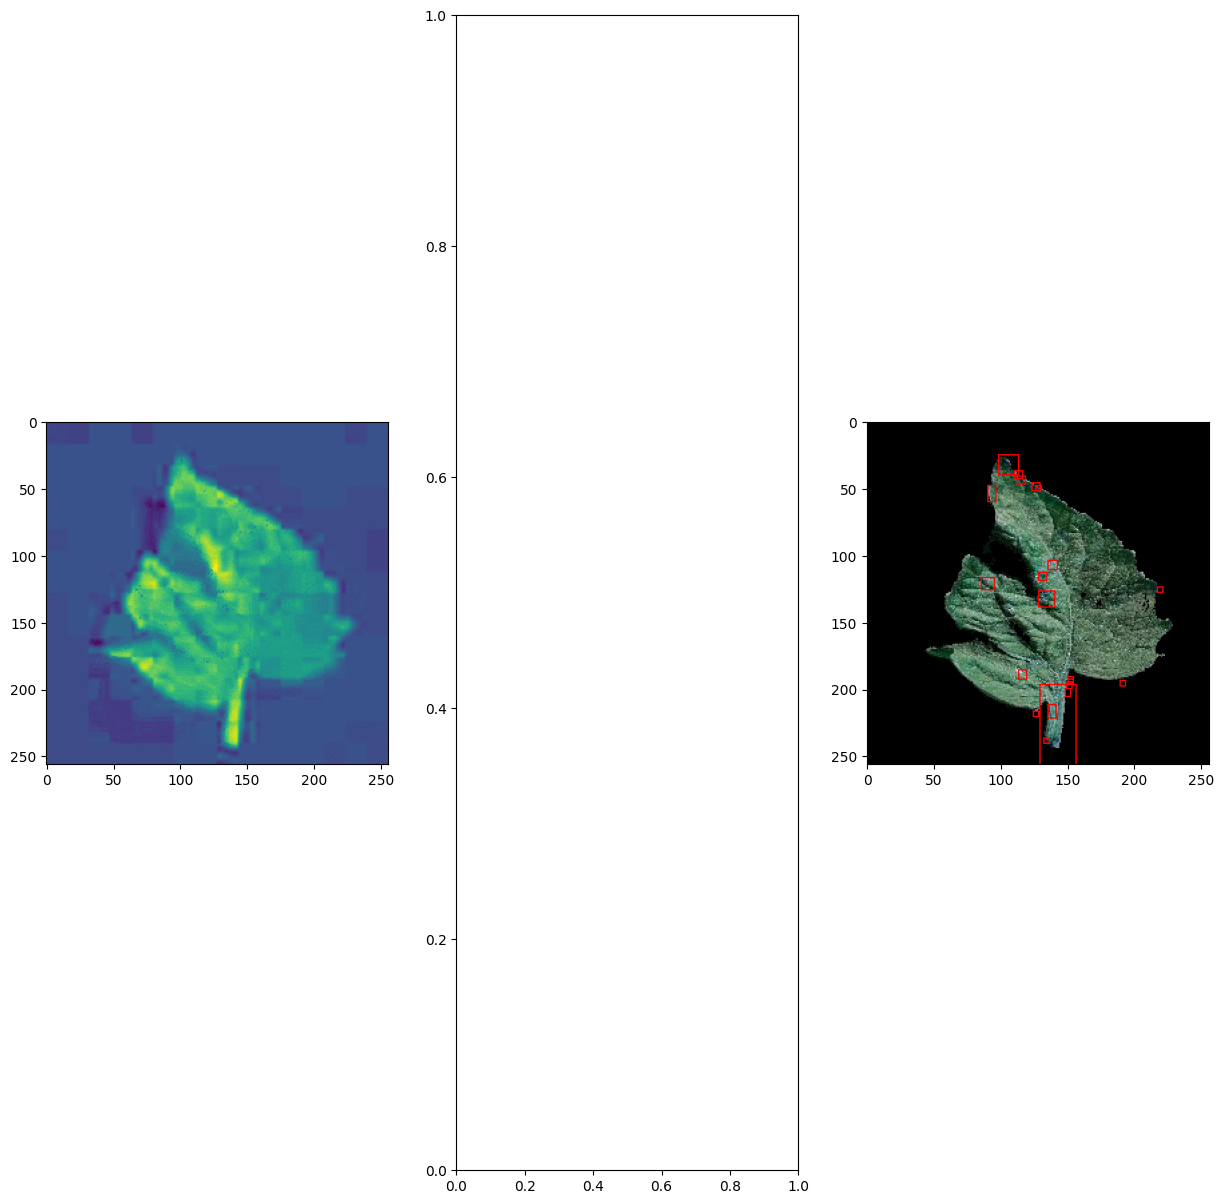

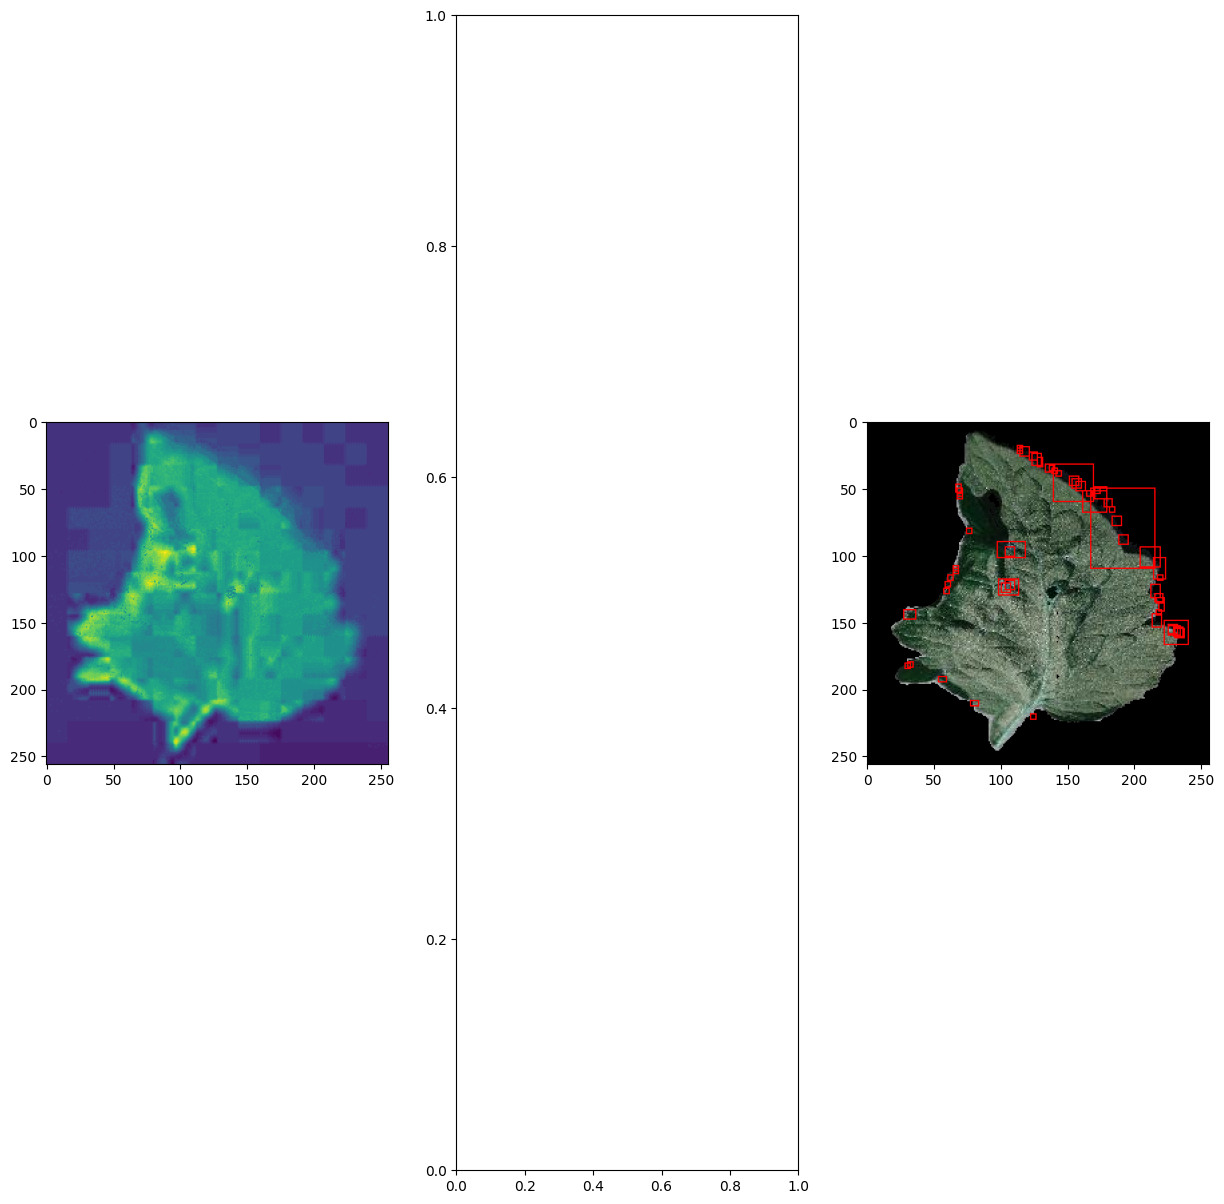

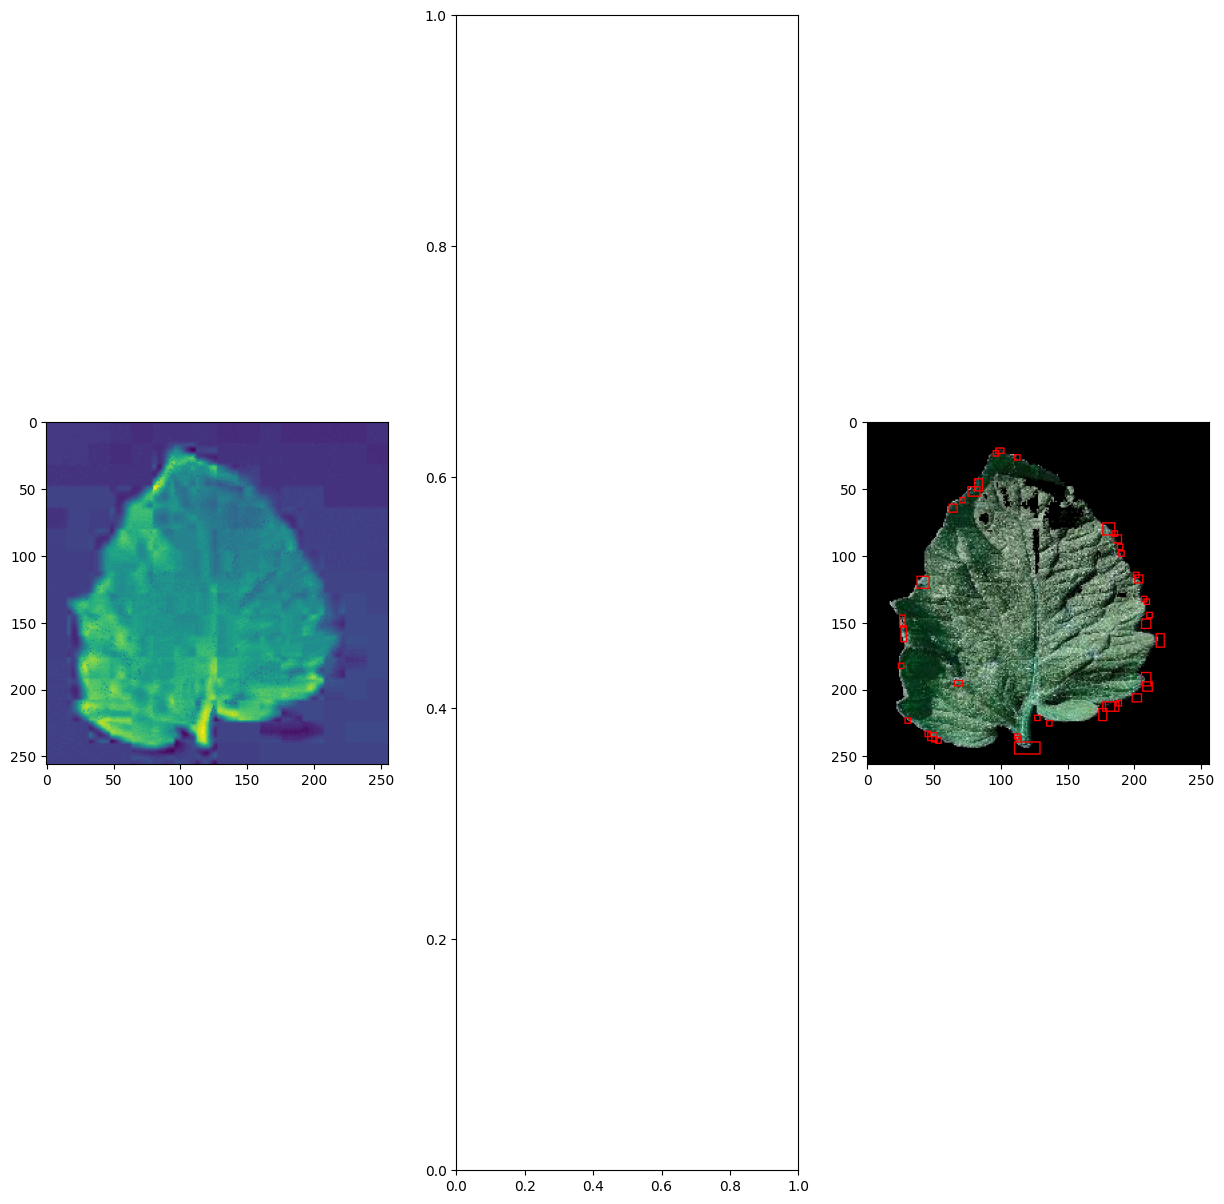

In [ ]:
# Since it is difficult to find out the diamond shape. We are only considering the brown color.
#After updating the code: the prediction went from 50 => +95%

import os
import cv2
import numpy as np
import shutil
import csv

print("Blue for TTS")

def detect_tts(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define the lower and upper bounds of the brown color
    lower_brown1 = np.array([0, 20, 20])
    upper_brown1 = np.array([30, 255, 255])
    lower_brown2 = np.array([151, 20, 20])
    upper_brown2 = np.array([180, 255, 255])

    # Create masks for both brown color ranges and combine them
    mask1 = cv2.inRange(hsv, lower_brown1, upper_brown1)
    mask2 = cv2.inRange(hsv, lower_brown2, upper_brown2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        contour_list = []
        # At least one brown spot was detected
        for contour in contours:
            print(contour)
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 0), 1)
            contour_list.append([x, y, w, h])
        plt.imshow(image)
        return True, contour_list
    else:
        # No brown spots were detected
        return False, contour_list


folder_path = r"TTS/TTS_images"
correct_folder = r"TTS/TTS_Output/correct"
incorrect_folder = r"TTS/TTS_Output/incorrect"

csv_file = "tts_contours.csv"
csv_columns = ["filename", "contours"]

with open(csv_file, "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=csv_columns)
    writer.writeheader()

for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        print(f"checking: {filename}...")
        # img_path = os.path.join(folder_path, filename)
        # img = cv2.imread(img_path)
        convertedImage = removeBg(folder_path, filename)
        has_tts, contour_list = detect_tts(convertedImage)

        if contour_list is not None:
            # Save the contour coordinates in a CSV file
            with open(csv_file, "a", newline="") as f:
                writer = csv.DictWriter(f, fieldnames=csv_columns)
                writer.writerow({"filename": filename, "contours": contour_list})

        # Save the image in the output folder
        if has_tts:
            output_path = os.path.join(correct_folder, filename)
            print(f"{filename} has brown spots")
            cv2.imwrite(output_path, convertedImage)
        else:
            output_path = os.path.join(incorrect_folder, filename)
            cv2.imwrite(output_path, convertedImage)

In [ ]:
# Curl + Yellow
# Conclusion: We are able to detect the yellow pathes. But we are not able to detect the curl parts of some images.
import os
import cv2
import numpy as np
import shutil

print("Black for TYLCV")

import cv2
import numpy as np

import cv2
import numpy as np

def mark_curled(image):
    try:
        # 1. Convert the image to the LAB color space
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

        # 2. Split the LAB image into channels
        l, a, b = cv2.split(lab)

        # 3. Apply adaptive thresholding on the 'a' channel
        _, thresholded = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 4. Morphological operations to enhance the thresholded image
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)

        # 5. Find contours in the thresholded image
        contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 6. Find the largest contour
        curled_contour = max(contours, key=cv2.contourArea)

        # 7. Draw a rectangle around the curled part of the leaf
        x, y, w, h = cv2.boundingRect(curled_contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        return True

    except Exception as e:
        print("An error occurred:", str(e))
        return False


# def mark_curled(image,filename):
#     try:
#       # 1. Read and pre-process the image
#       # img = cv2.imread(image)
#       gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#       _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#       # 2. Use contour detection to find the contours of the leaf, Border of the leaves, finding the leaf in the image
#       contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#       c = max(contours, key=cv2.contourArea)

#       # 3. Use image moments to calculate the centroid, area, and orientation of the leaf
#       # it is leaf or not
#       M = cv2.moments(c)
#       if M["m00"] != 0:
#           cX = int(M["m10"] / M["m00"])
#           cY = int(M["m01"] / M["m00"])
#           area = cv2.contourArea(c)
#           (x, y), (MA, ma), angle = cv2.fitEllipse(c)
#       else:
#           return "Leaf not found"

#       # 4. Use the calculated properties to determine whether the leaf is curled up or not
#       if angle > 34:
#           # 5. Mark the curled part of the leaf by drawing a rectangle around it
#           rect = cv2.minAreaRect(c)
#           box = cv2.boxPoints(rect)
#           box = np.int0(box)
#           print("Leaf contours:")
#           print(box)
#           cv2.drawContours(img,[box],0,(0,255,0),1)
#           return True
#       else:
#           return False
#     except:
#       print("There was some error in " + filename)

def detect_yellow(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the yellow color
    lower_yellow = np.array([44, 117, 82])
    upper_yellow = np.array([44, 255, 136])

    # Create a mask of the yellow areas
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one yellow spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (0, 0, 255), 1)
        return True
    else:
        # No brown spots were detected
        return False

folder_path = r"TYLCV/TYLCV_images"
correct_folder = r"TYLCV/TYLCV_Output/correct"
incorrect_folder = r"TYLCV/TYLCV_Output/incorrect"

for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        print(f"checking: {filename}...")
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        convertedImage = removeBg(folder_path, filename)

        has_curl = mark_curled(img)
        has_yellow = detect_yellow(img)

        if has_curl:
          print(f"{filename} has curls")

        if has_yellow:
          print(f"{filename} has yellow spots")

        # Save the image in the output folder
        if (has_curl and has_yellow):
            output_path = os.path.join(correct_folder, filename)
            cv2.imwrite(output_path, img)
        else:
            output_path = os.path.join(incorrect_folder, filename)
            cv2.imwrite(output_path, img)



Black for TYLCV


# Since it is difficult to find out the diamond shape. We are only considering the brown color.
#After updating the code: the prediction went from 50 => +95%

import os
import cv2
import numpy as np
import shutil
import csv

print("Blue for TTS")

def detect_tts(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define the lower and upper bounds of the brown color
    lower_brown1 = np.array([0, 20, 20])
    upper_brown1 = np.array([30, 255, 255])
    lower_brown2 = np.array([151, 20, 20])
    upper_brown2 = np.array([180, 255, 255])

    # Create masks for both brown color ranges and combine them
    mask1 = cv2.inRange(hsv, lower_brown1, upper_brown1)
    mask2 = cv2.inRange(hsv, lower_brown2, upper_brown2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        contour_list = []
        # At least one brown spot was detected
        for contour in contours:
            print(contour)
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 0), 1)
            contour_list.append([x, y, w, h])
        plt.imshow(image)
        return True, contour_list
    else:
        # No brown spots were detected
        return False, contour_list


folder_path = r"TTS/TTS_images"
correct_folder = r"TTS/TTS_Output/correct"
incorrect_folder = r"TTS/TTS_Output/incorrect"

csv_file = "tts_contours.csv"
csv_columns = ["filename", "contours"]

with open(csv_file, "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=csv_columns)
    writer.writeheader()

for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        print(f"checking: {filename}...")
        # img_path = os.path.join(folder_path, filename)
        # img = cv2.imread(img_path)
        convertedImage = removeBg(folder_path, filename)
        has_tts, contour_list = detect_tts(convertedImage)

        if contour_list is not None:
            # Save the contour coordinates in a CSV file
            with open(csv_file, "a", newline="") as f:
                writer = csv.DictWriter(f, fieldnames=csv_columns)
                writer.writerow({"filename": filename, "contours": contour_list})

        # Save the image in the output folder
        if has_tts:
            output_path = os.path.join(correct_folder, filename)
            print(f"{filename} has brown spots")
            cv2.imwrite(output_path, convertedImage)
        else:
            output_path = os.path.join(incorrect_folder, filename)
            cv2.imwrite(output_path, convertedImage)

checking: image (4).JPG...
checking: image (4).JPG...


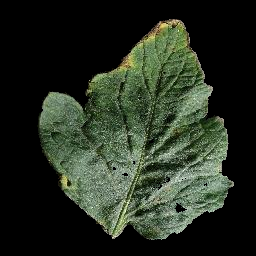

checking: image (9).JPG...
checking: image (9).JPG...


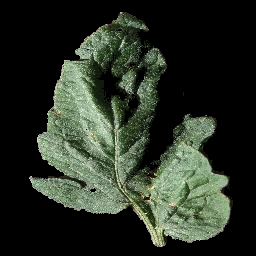

Leaf contours:
[[ 11 184]
 [ 83  14]
 [279  97]
 [207 267]]
checking: image (7).JPG...
checking: image (7).JPG...


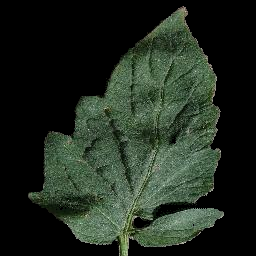

checking: image (6).JPG...
checking: image (6).JPG...


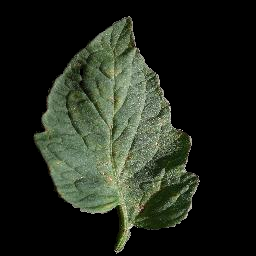

checking: image (3).JPG...
checking: image (3).JPG...


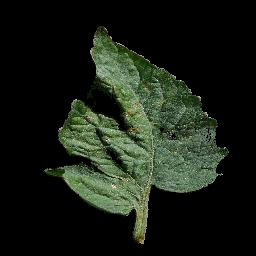

Leaf contours:
[[  9 141]
 [104  19]
 [252 135]
 [157 256]]
checking: image (1).JPG...
checking: image (1).JPG...


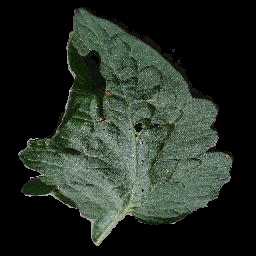

checking: image (10).JPG...
checking: image (10).JPG...


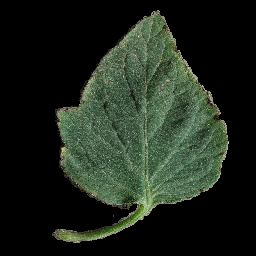

checking: image (8).JPG...
checking: image (8).JPG...


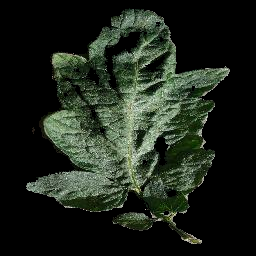

checking: image (2).JPG...
checking: image (2).JPG...


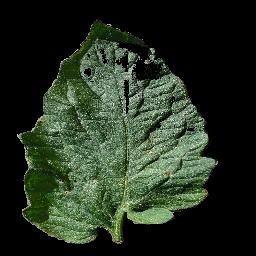

checking: image (5).JPG...
checking: image (5).JPG...


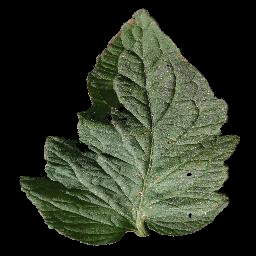

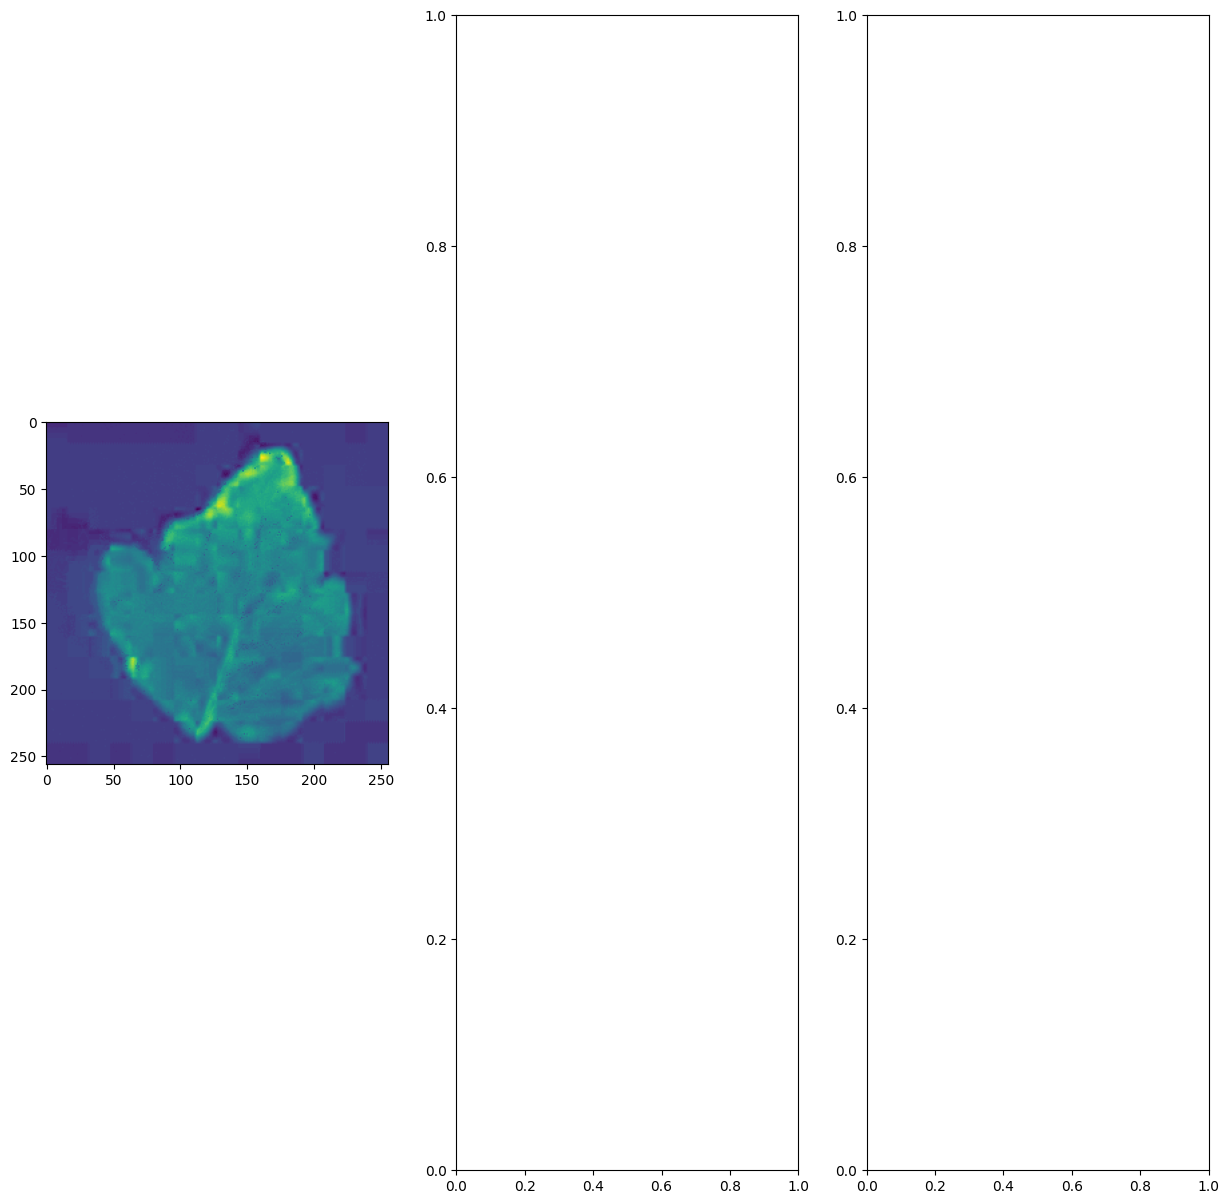

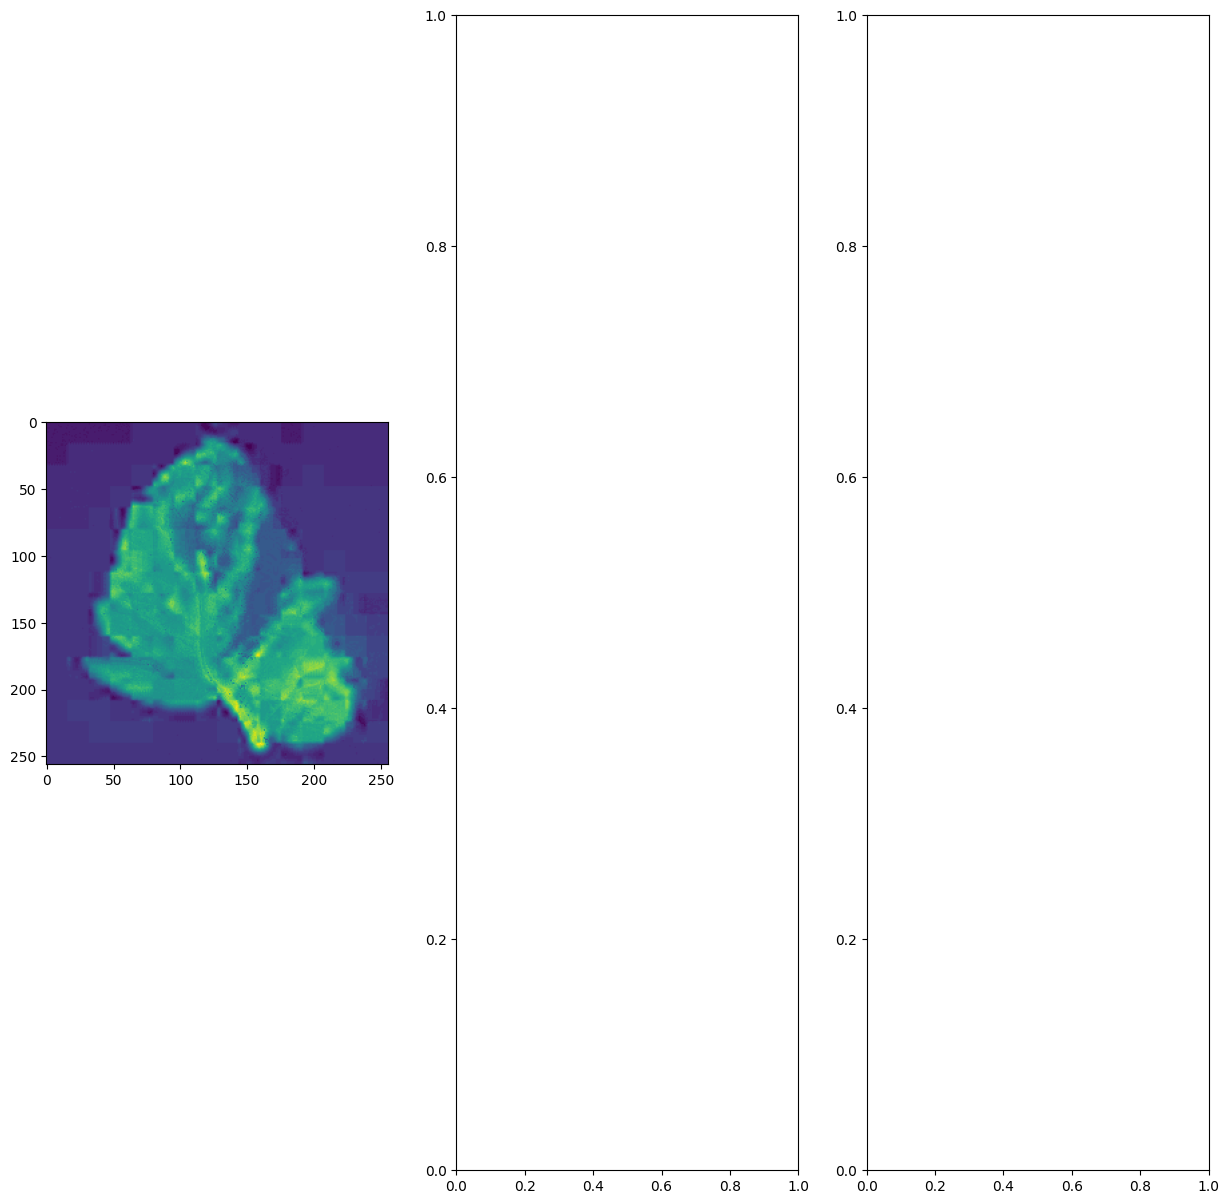

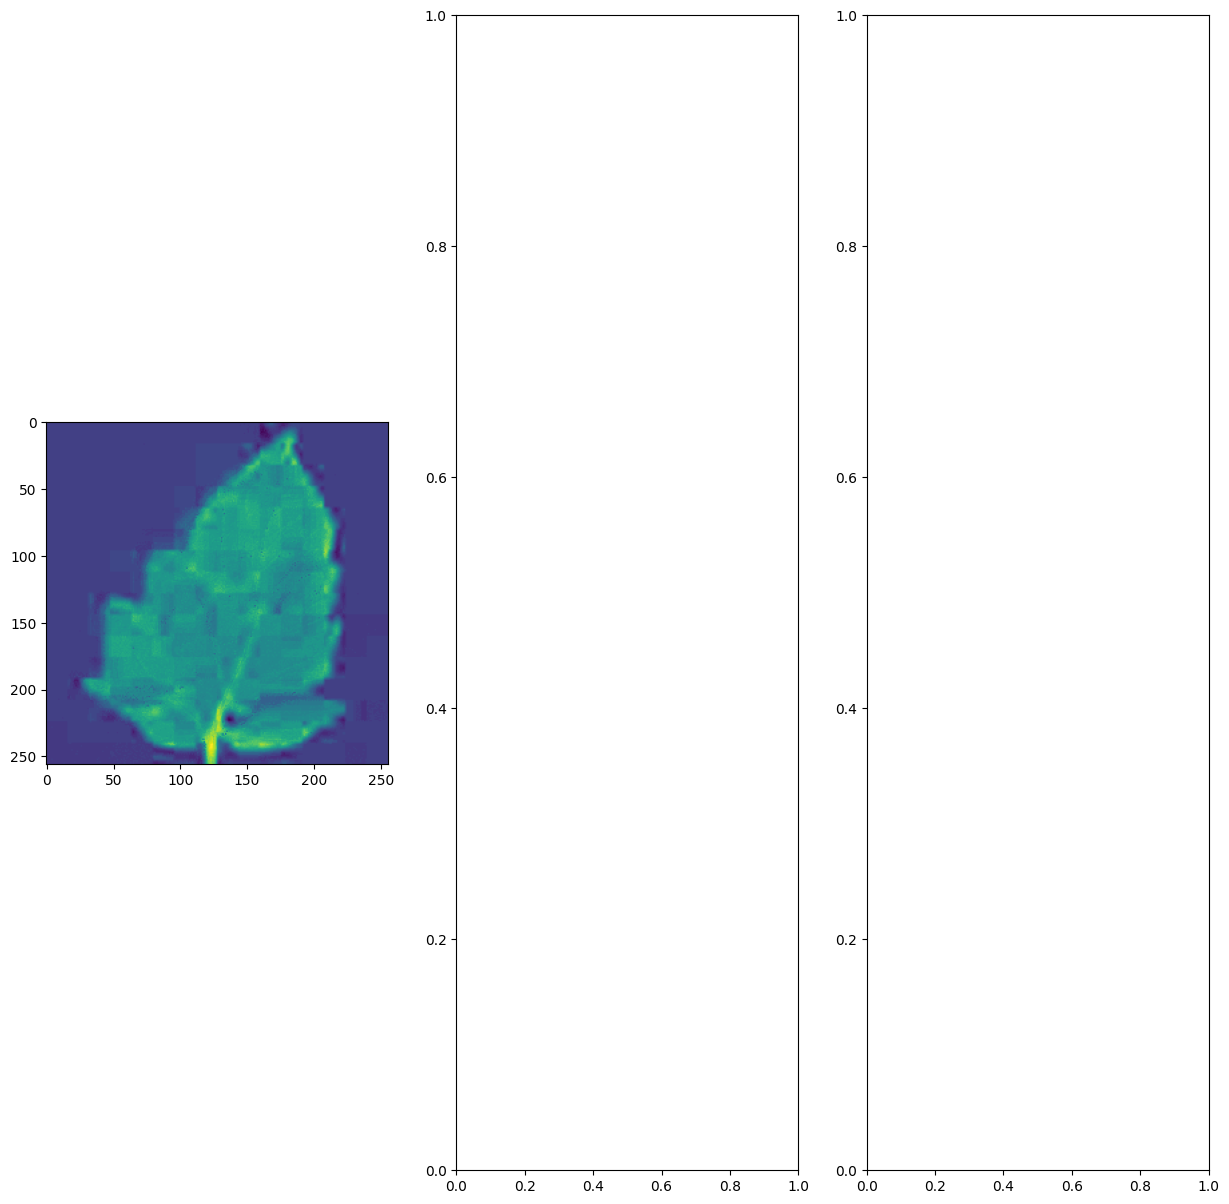

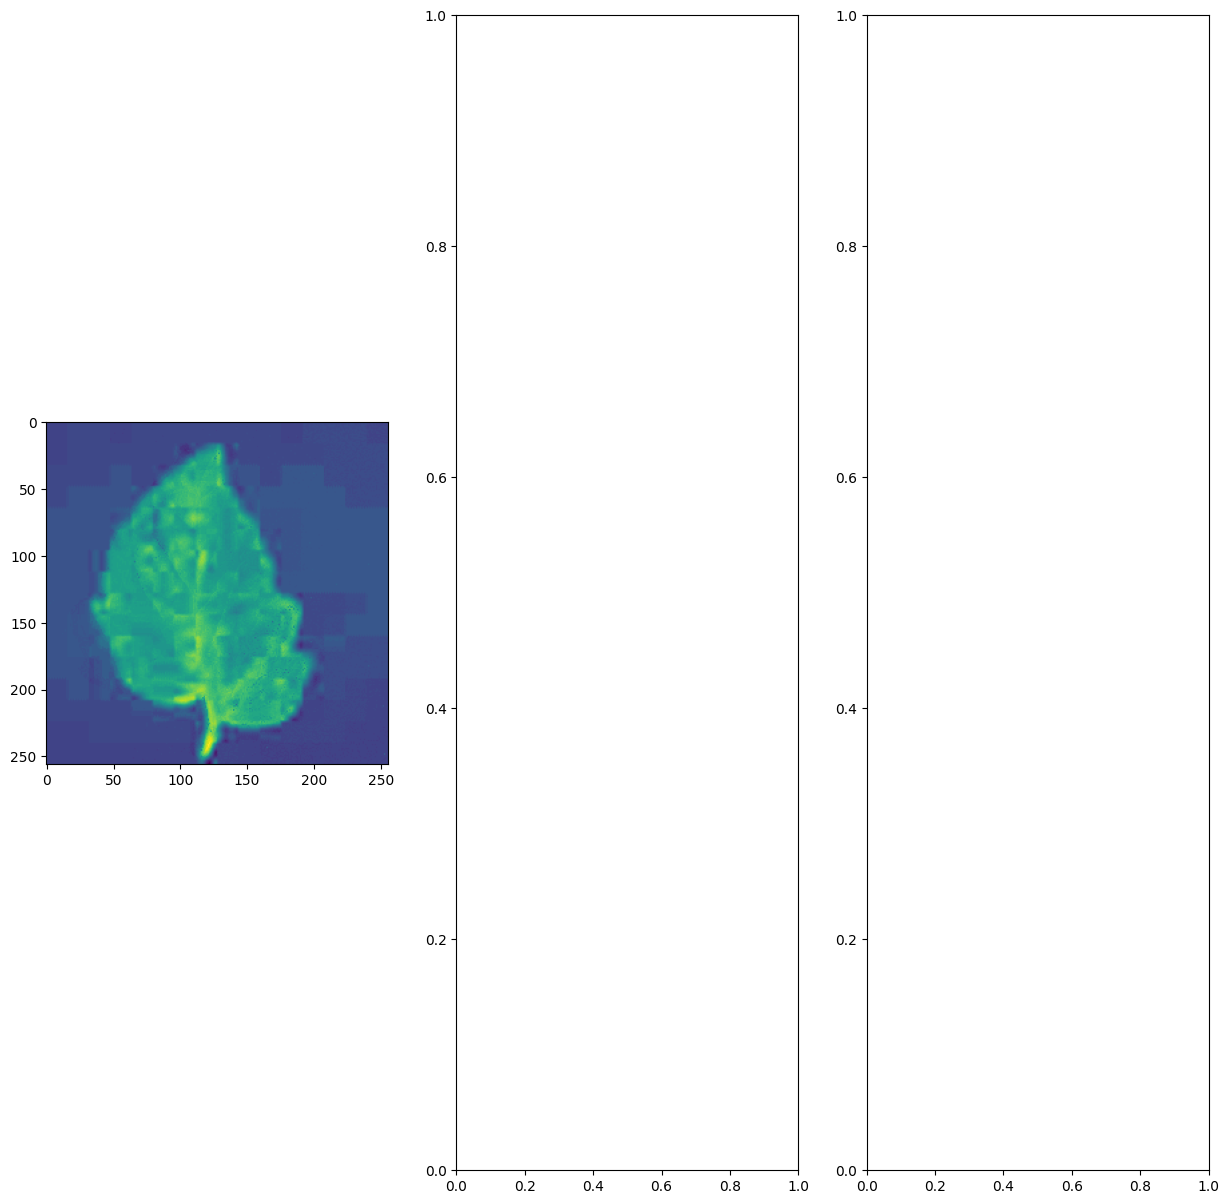

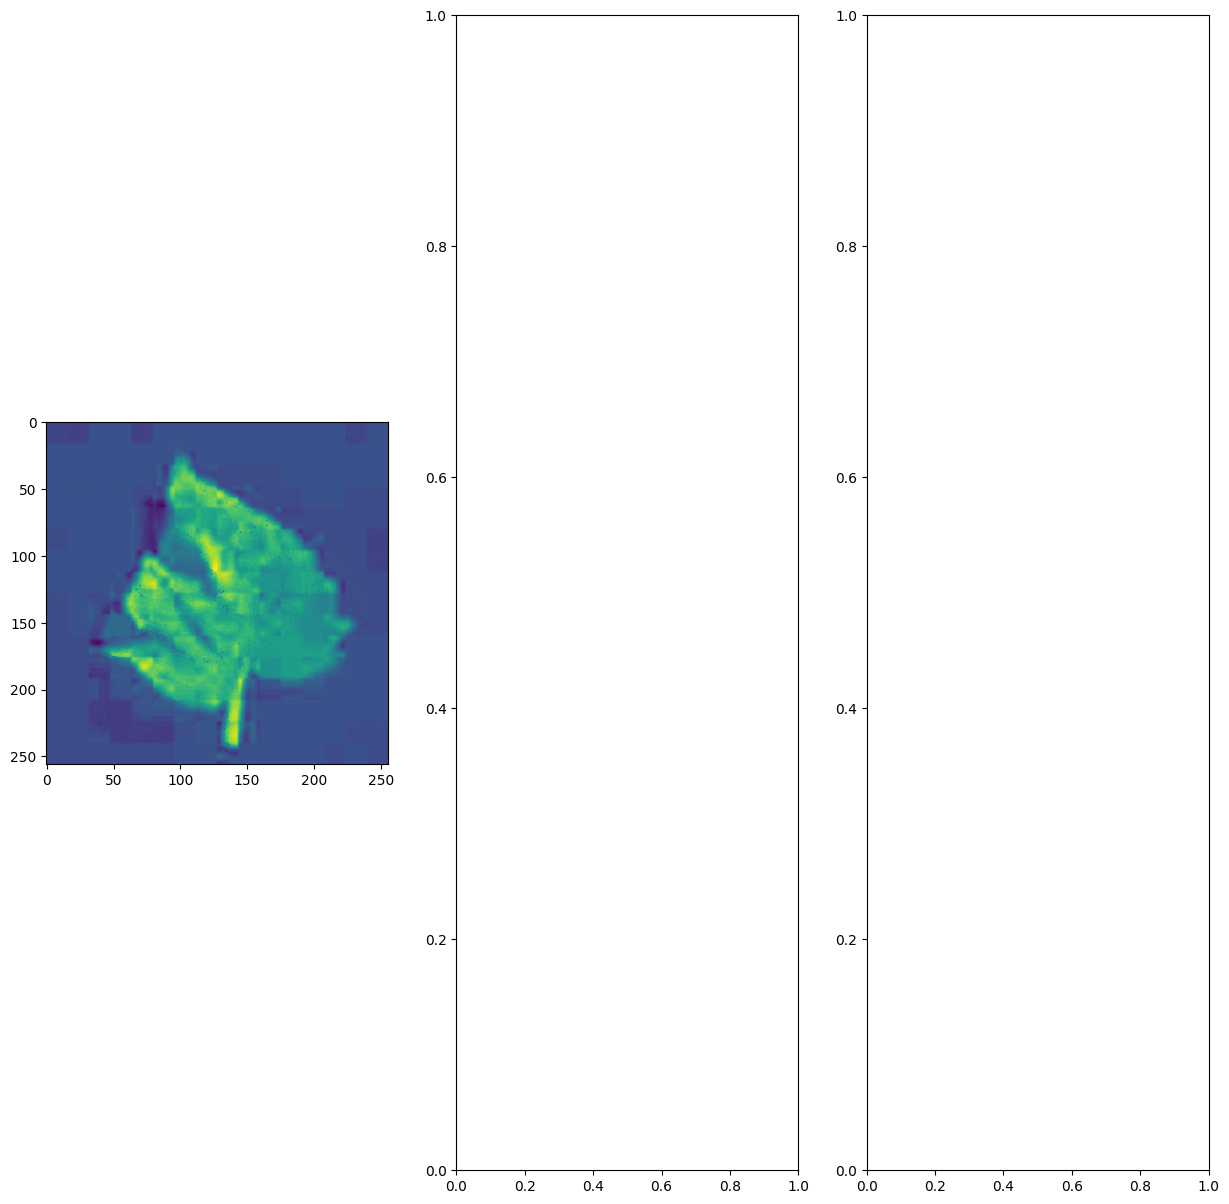

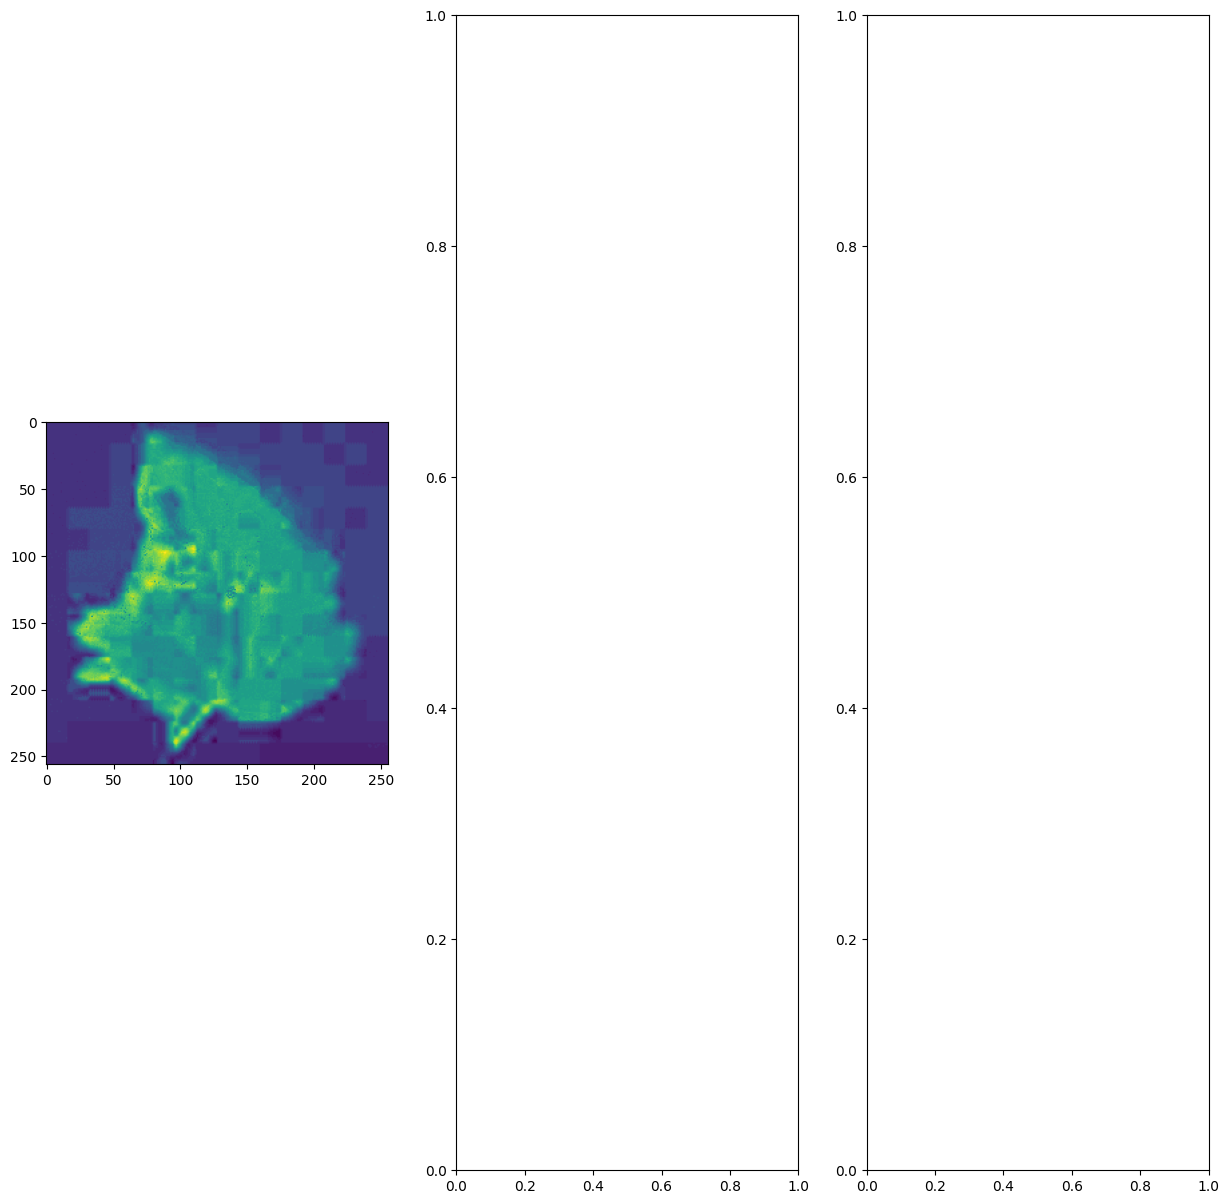

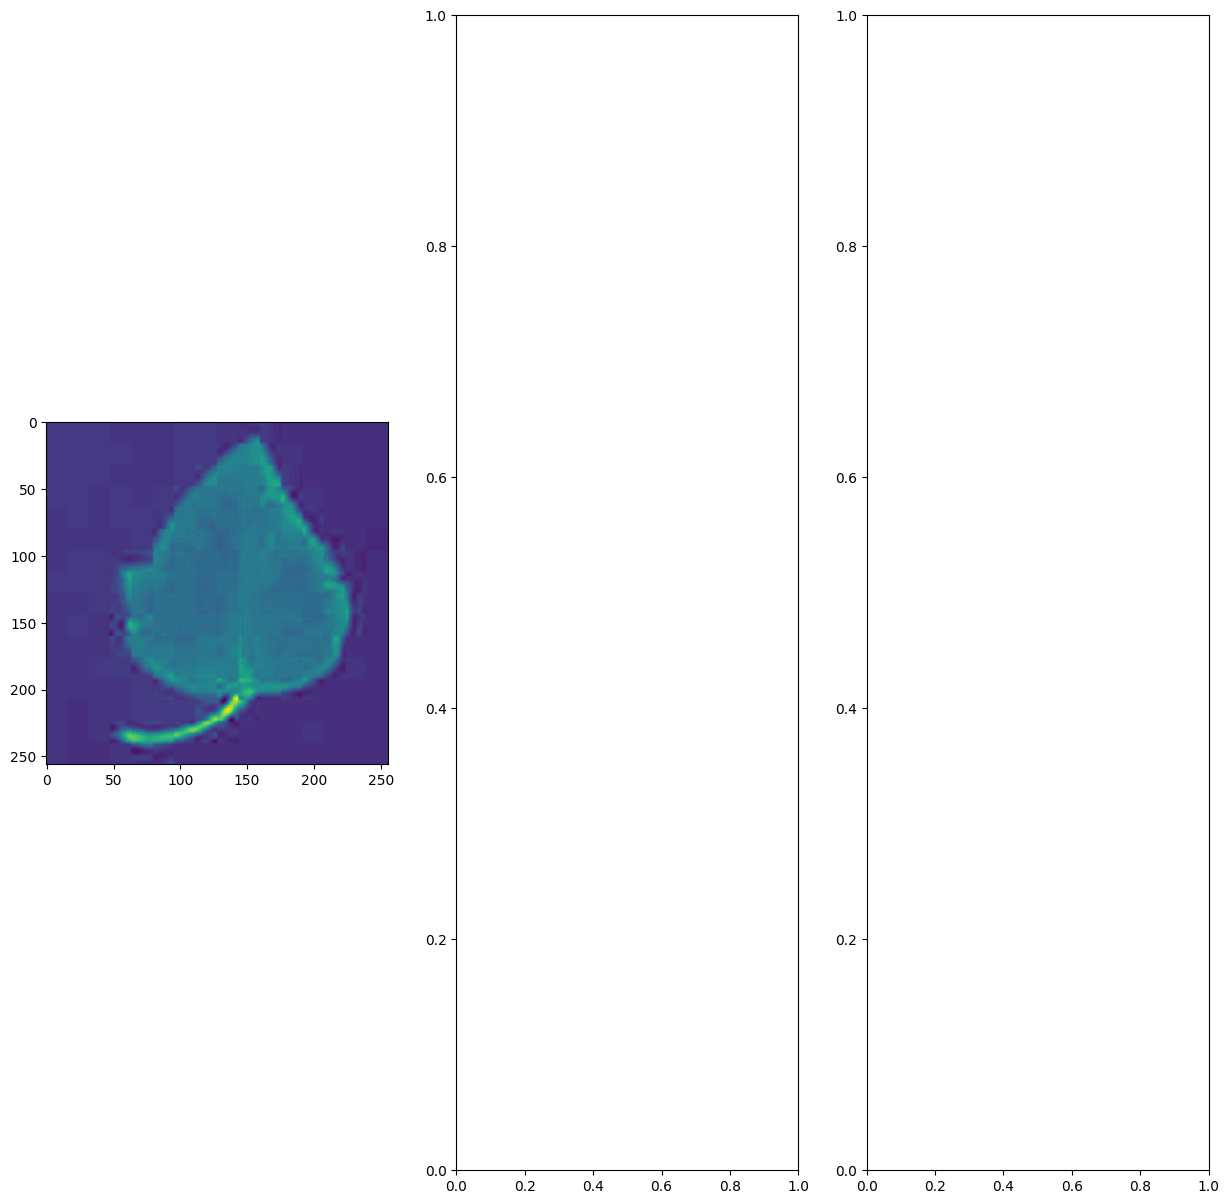

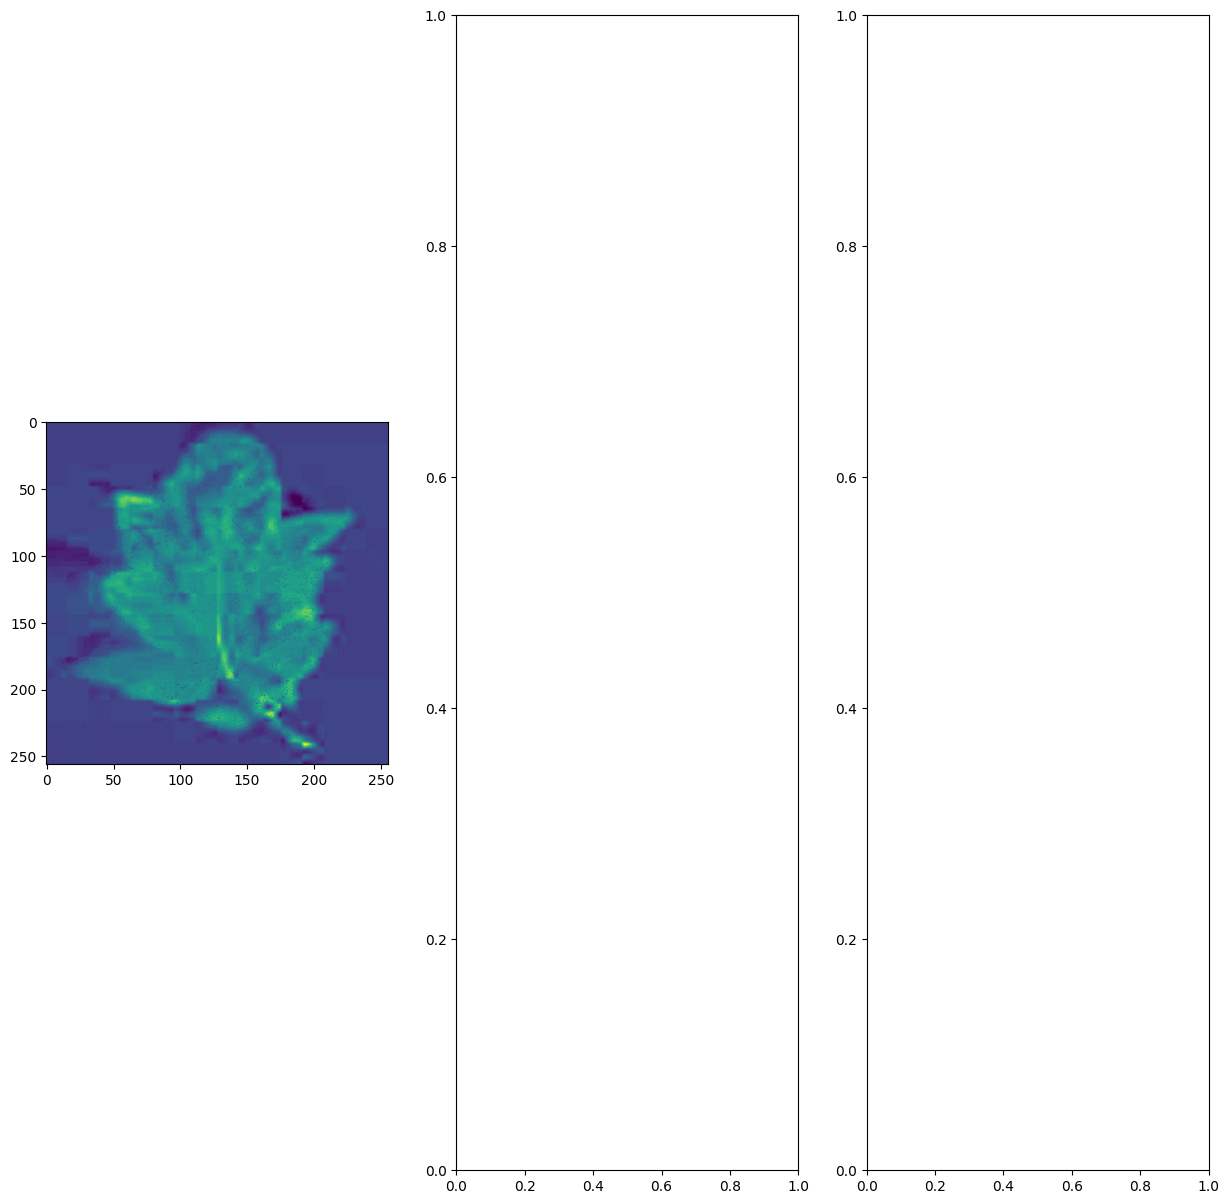

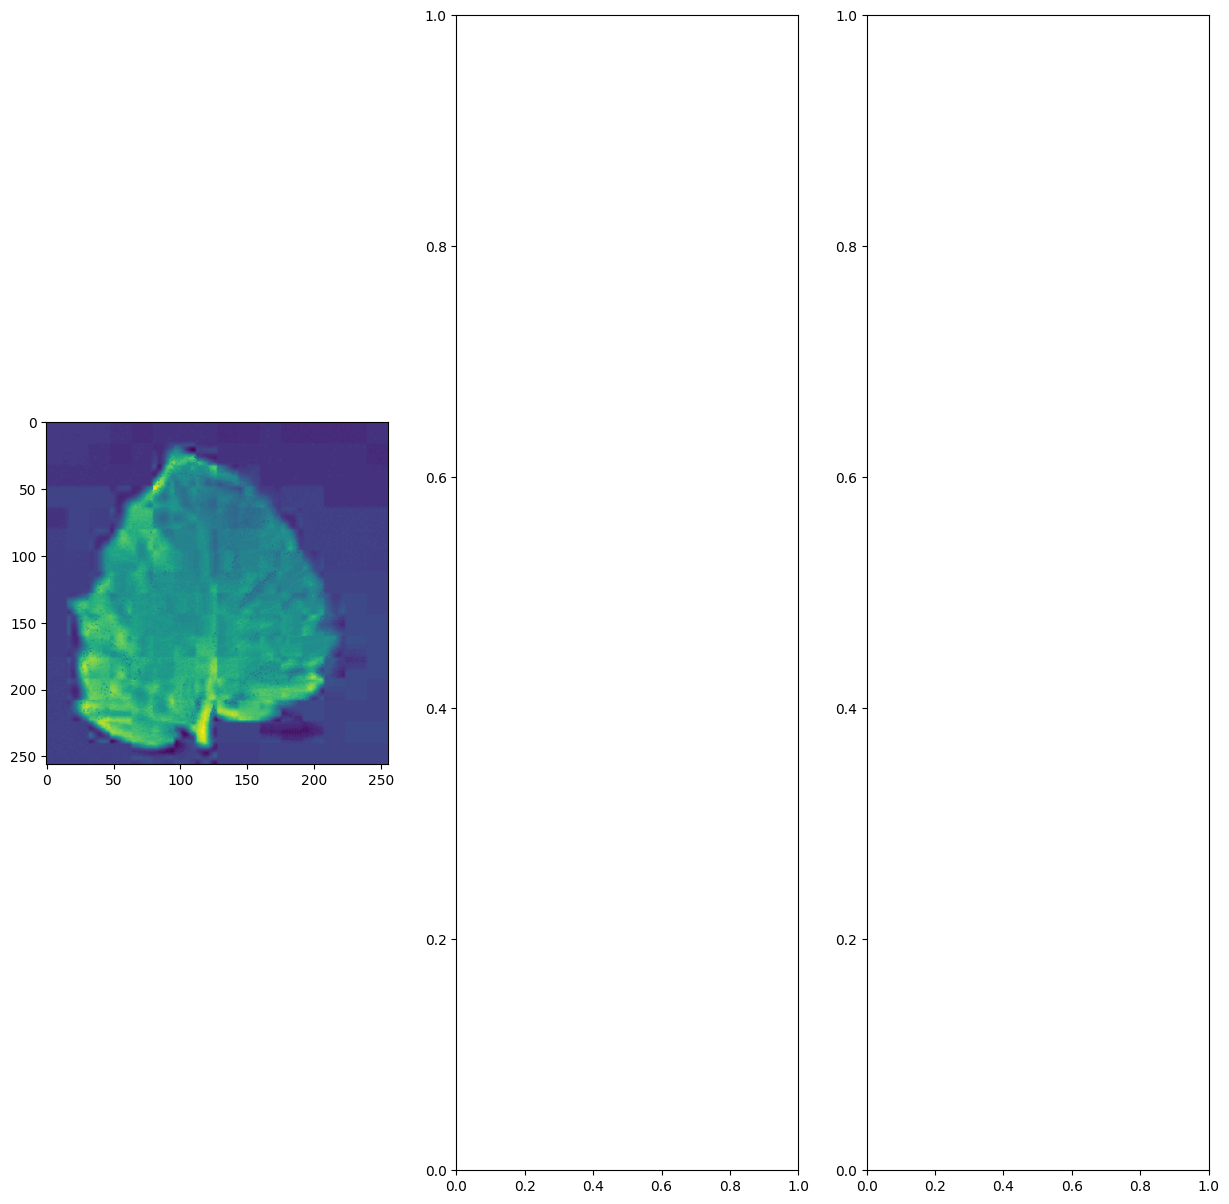

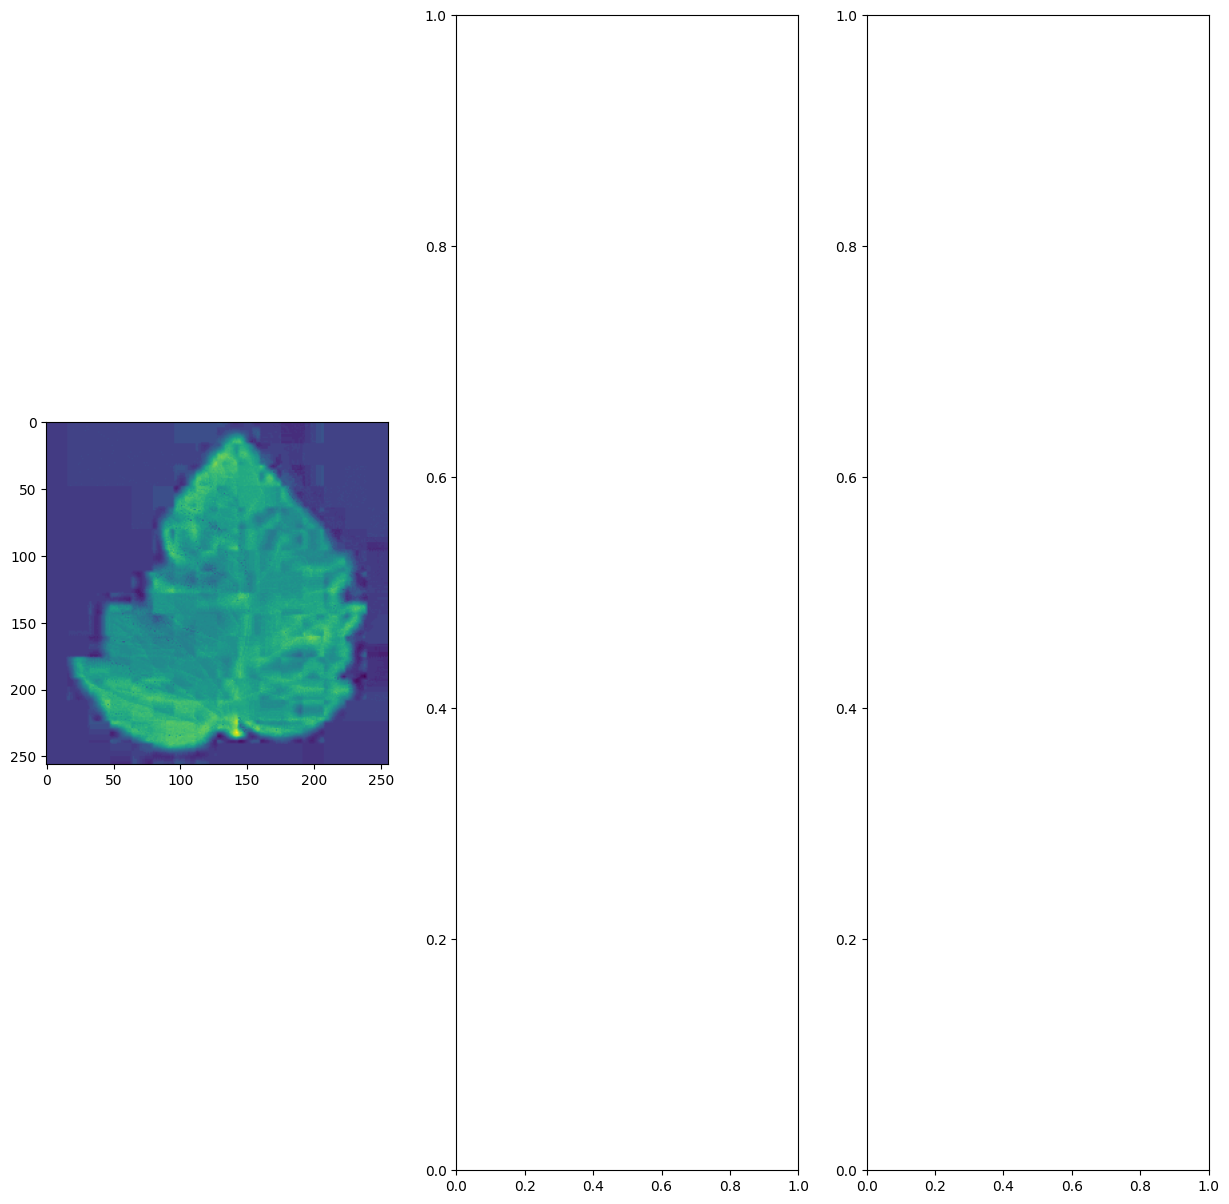

In [118]:
# OLD FILE FOR This is the master function which will detect multiple diseases from a single leaf.

# # This is the master function which will detect multiple diseases from a single leaf.
import os
import cv2
import numpy as np
import shutil
import csv


def mark_curled(image,filename):
    try:
      # 1. Read and pre-process the image
      # img = cv2.imread(image)
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

      # 2. Use contour detection to find the contours of the leaf, Border of the leaves, finding the leaf in the image
      contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      c = max(contours, key=cv2.contourArea)

      # 3. Use image moments to calculate the centroid, area, and orientation of the leaf
      # it is leaf or not
      M = cv2.moments(c)
      if M["m00"] != 0:
          cX = int(M["m10"] / M["m00"])
          cY = int(M["m01"] / M["m00"])
          area = cv2.contourArea(c)
          (x, y), (MA, ma), angle = cv2.fitEllipse(c)
      else:
          return "Leaf not found"

      # 4. Use the calculated properties to determine whether the leaf is curled up or not
      if angle > 40:
          # 5. Mark the curled part of the leaf by drawing a rectangle around it
          rect = cv2.minAreaRect(c)
          box = cv2.boxPoints(rect)
          box = np.int0(box)
          print("Leaf contours:")
          print(box)
          # cv2.drawContours(img,[box],0,(0,255,0),1)
          return True, [box]
      else:
          return False,[]
    except:
      print("There was some error in " + filename)


def detect_yellow(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the light greenish yellow
    lower_yellow = np.array([20, 100, 60])
    upper_yellow = np.array([60, 255, 180])

    # Create a mask of the brown areas
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one brown spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            # cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 255, 0), 1)
        return True, contours
    else:
        # No yellow spots were detected
        return False, []


# It looks for gray and tan spots
def detect_gray(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the gray and tan colors
    lower_gray = np.array([0, 0, 0])
    upper_gray = np.array([180, 50, 150])
    lower_tan = np.array([0, 20, 151])
    upper_tan = np.array([180, 50, 255])

    # Create masks for gray and tan colors separately
    gray_mask = cv2.inRange(hsv, lower_gray, upper_gray)
    tan_mask = cv2.inRange(hsv, lower_tan, upper_tan)

    # Combine the masks to include both gray and tan areas
    combined_mask = cv2.bitwise_or(gray_mask, tan_mask)

    # Find contours in the combined mask
    contours, hierarchy = cv2.findContours(combined_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one gray or tan spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w // 4
            y -= h // 4
            w += w // 2
            h += h // 2
            # cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 255), 1)
        return True, contours
    else:
        # No gray or tan spots were detected
        return False, []

def detect_brown(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define the lower and upper bounds of the brown color
    lower_brown1 = np.array([0, 20, 20])
    upper_brown1 = np.array([30, 255, 255])
    lower_brown2 = np.array([151, 20, 20])
    upper_brown2 = np.array([180, 255, 255])

    # Create masks for both brown color ranges and combine them
    mask1 = cv2.inRange(hsv, lower_brown1, upper_brown1)
    mask2 = cv2.inRange(hsv, lower_brown2, upper_brown2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one brown spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            # cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 0), 1)
        return True, contours
    else:
        # No brown spots were detected
        return False, []

def drawContours(img,contours,color):
  tempImg = img
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    x -= w//4
    y -= h//4
    w += w//2
    h += h//2
    cv2.rectangle(tempImg, (x, y), (x+w+3 , y+h+3), color, 1)
  return tempImg

# folder_path = r"Test"
folder_path = r"Master/input_images"

output_img_folder = r"Master/output_images"
tmv_folder = r"Master/TMV"
tsls_folder = r"Master/TSLS"
tylcv_folder = r"Master/TYLCV"
tts_folder = r"Master/TTS"

csv_file = "master_contours.csv"
csv_columns = ["filename", "tsls","tts","tmv",'tylcv']

with open(csv_file, "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=csv_columns)
    writer.writeheader()


for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        print(f"checking: {filename}...")
        img_path = os.path.join(folder_path, filename)


        # img = cv2.imread(img_path)
        convertedImage = removeBg(folder_path, filename)

        has_gray, gray_contours = detect_gray(convertedImage)
        has_brown, brown_contours = detect_brown(convertedImage)
        has_yellow, yellow_contours = detect_yellow(convertedImage)
        has_curled, curled_contours = mark_curled(convertedImage,filename)

        # with open(csv_file, "a", newline="") as f:
        #        writer = csv.DictWriter(f, fieldnames=csv_columns)
        #        writer.writerow({"filename": filename, "tsls": brown_contours + gray_contours,"tts": brown_contours ,"tmv": yellow_contours + brown_contours ,'tylcv': curled_contours + yellow_contours})

        # if has_brown:
        #   print(f"{filename} has brown spots")

        # if has_gray:
        #   print(f"{filename} has gray spots")

        # if has_yellow:
        #   print(f"{filename} has yellow spots")

        # if has_curled:
        #   print(f"{filename} has curls")

        # Output Image Folder
        output_path = os.path.join(output_img_folder, filename)
        cv2.imwrite(output_path, convertedImage)

        # TSLS
        if has_gray and has_brown and has_yellow:
            img_path = os.path.join(folder_path , filename)
            # Load the image
            image = cv2.imread(img_path)
            tempTSLSImg = drawContours(image,gray_contours,(255,255,0))
            drawContours(tempTSLSImg,brown_contours,(255,255,0))
            drawContours(tempTSLSImg,yellow_contours,(255,255,0))
            # Save to specific folder
            output_path = os.path.join(tsls_folder, filename)
            cv2.imwrite(output_path, tempTSLSImg)

        #  TTS
        if has_brown:
            img_path = os.path.join(folder_path, filename)
            # Load the image
            image = cv2.imread(img_path)
            tempTTSImg = drawContours(image,brown_contours,(0,255,0))
            # Save to specific folder
            output_path = os.path.join(tts_folder, filename)
            cv2.imwrite(output_path, tempTTSImg)

        # TMV
        if has_yellow or has_brown:
            img_path = os.path.join(folder_path , filename)
            # Load the image
            image = cv2.imread(img_path)
            tempTMVImg = drawContours(image,yellow_contours,(255,0,255))
            drawContours(tempTMVImg,brown_contours,(255,0,255))
            # Save to specific folder
            output_path = os.path.join(tmv_folder, filename)
            cv2.imwrite(output_path, tempTMVImg)

        # TYLCV
        if (has_curled and has_yellow):
            img_path = os.path.join(folder_path , filename)
            # Load the image
            image = cv2.imread(img_path)
            tempTYLCVImg = drawContours(image,yellow_contours,(255,0,0))
            drawContours(tempTYLCVImg,curled_contours,(255,0,0))
            # Save to specific folder
            output_path = os.path.join(tylcv_folder, filename)
            cv2.imwrite(output_path, tempTYLCVImg)





In [105]:
# # This is the master function which will detect multiple diseases from a single leaf. (NEW FILE )
import os
import cv2
import numpy as np
import shutil
import csv

def mark_curled(image, filename):
    try:
        # 1. Read and pre-process the image by converting it to grayscale and applying Otsu's thresholding method  to create a binary image.
        # This help in  finding contours of leaf

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#convertion of any (RGB)input img to grayscale.
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)# automatically calculates an optimal threshold value based on the image's histogram.

        # 2. Use contour detection to find the contours of the leaf, Border of the leaves, finding the leaf in the image
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if not contours:
            return False, []  # Leaf not found

        c = max(contours, key=cv2.contourArea)

        # 3. Use image moments to calculate the centroid, area, and orientation of the leaf
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            area = cv2.contourArea(c)
            (x, y), (MA, ma), angle = cv2.fitEllipse(c)
        else:
            return False, []  # Leaf not found

        # 4. Use the calculated properties to determine whether the leaf is curled up or not
        if angle > 40:
            # 5. Mark the curled part of the leaf by drawing a rectangle around it
            rect = cv2.minAreaRect(c)
            box = cv2.boxPoints(rect)#return 4 corner point coordinates (floating value)
            box = np.int0(box)# all 4 coordinates to integer
            print("Leaf contours:")
            print(box)
            # cv2.drawContours(img,[box],0,(0,255,0),1)
            return True, [box]
        else:
            return False, []
    except Exception as e:
        print(f"There was some error in {filename}: {str(e)}")
        return False, []



def detect_yellow(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the light greenish yellow
    lower_yellow = np.array([20, 100, 60])
    upper_yellow = np.array([60, 255, 180])

    # Create a mask of the brown areas
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one brown spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            # cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 255, 0), 1)
        return True, contours
    else:
        # No yellow spots were detected
        return False, []


# It looks for gray and tan spots
def detect_gray(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the gray and tan colors
    lower_gray = np.array([0, 0, 0])
    upper_gray = np.array([180, 50, 150])
    lower_tan = np.array([0, 20, 151])
    upper_tan = np.array([180, 50, 255])

    # Create masks for gray and tan colors separately
    gray_mask = cv2.inRange(hsv, lower_gray, upper_gray)
    tan_mask = cv2.inRange(hsv, lower_tan, upper_tan)

    # Combine the masks to include both gray and tan areas
    combined_mask = cv2.bitwise_or(gray_mask, tan_mask)

    # Find contours in the combined mask
    contours, hierarchy = cv2.findContours(combined_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one gray or tan spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w // 4
            y -= h // 4
            w += w // 2
            h += h // 2
            # cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 255), 1)
        return True, contours
    else:
        # No gray or tan spots were detected
        return False, []

def detect_brown(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define the lower and upper bounds of the brown color
    lower_brown1 = np.array([0, 20, 20])
    upper_brown1 = np.array([30, 255, 255])
    lower_brown2 = np.array([151, 20, 20])
    upper_brown2 = np.array([180, 255, 255])

    # Create masks for both brown color ranges and combine them
    mask1 = cv2.inRange(hsv, lower_brown1, upper_brown1)
    mask2 = cv2.inRange(hsv, lower_brown2, upper_brown2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # At least one brown spot was detected
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            x -= w//4
            y -= h//4
            w += w//2
            h += h//2
            # cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 0), 1)
        return True, contours
    else:
        # No brown spots were detected
        return False, []

def drawContours(img,contours,color):
  tempImg = img
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    x -= w//4
    y -= h//4
    w += w//2
    h += h//2
    cv2.rectangle(tempImg, (x, y), (x+w+3 , y+h+3), color, 1)
  return tempImg

folder_path = r"Master/input_images/"
output_img_folder = r"Master/output_images/Output"
tmv_folder = r"Master/output_images/TMV"
tsls_folder = r"Master/output_images/TSLS"
tylcv_folder = r"Master/output_images/TYLCV"
tts_folder = r"Master/output_images/TTS"

csv_file = "master_contours.csv"
csv_columns = ["filename", "tsls", "tts", "tmv", "tylcv"]

with open(csv_file, "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=csv_columns)
    writer.writeheader()


for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        print(f"Checking: {filename}...")
        img_path = os.path.join(folder_path, filename)

        # Load the image
        image = cv2.imread(img_path)

        has_gray, gray_contours = detect_gray(image)
        has_brown, brown_contours = detect_brown(image)
        has_yellow, yellow_contours = detect_yellow(image)
        has_curled, curled_contours = mark_curled(image, filename)

        # with open(csv_file, "a", newline="") as f:
        #        writer = csv.DictWriter(f, fieldnames=csv_columns)
        #        writer.writerow({"filename": filename, "tsls": brown_contours + gray_contours,"tts": brown_contours ,"tmv": yellow_contours + brown_contours ,'tylcv': curled_contours + yellow_contours})

        # if has_brown:
        #   print(f"{filename} has brown spots")

        # if has_gray:
        #   print(f"{filename} has gray spots")

        if has_yellow:
          print(f"{filename} has yellow spots")

        if has_curled:
          print(f"{filename} has curls")

        # Output Image Folder
        output_path = os.path.join(output_img_folder, filename)
        cv2.imwrite(output_path, image)

        if has_gray and has_brown and has_yellow:
            # TSLS
            tempTSLSImg = drawContours(image, gray_contours, (255, 255, 0))
            drawContours(tempTSLSImg, brown_contours, (255, 255, 0))
            drawContours(tempTSLSImg, yellow_contours, (255, 255, 0))
            # Save to specific folder
            output_path = os.path.join(tsls_folder, filename)
            cv2.imwrite(output_path, tempTSLSImg)

        if has_brown:
            # TTS
            tempTTSImg = drawContours(image, brown_contours, (0, 255, 0))
            # Save to specific folder
            output_path = os.path.join(tts_folder, filename)
            cv2.imwrite(output_path, tempTTSImg)

        if has_yellow or has_brown:
            # TMV
            tempTMVImg = drawContours(image, yellow_contours, (255, 0, 255))
            drawContours(tempTMVImg, brown_contours, (255, 0, 255))

            # Save to specific folder
            output_path = os.path.join(tmv_folder, filename)
            cv2.imwrite(output_path, tempTMVImg)


        if has_curled and has_yellow:
            # TYLCV

            tempTYLCVImg = drawContours(image, yellow_contours, (255, 0, 0))
            drawContours(tempTYLCVImg, curled_contours, (255, 0, 0))

            # Save to specific folder
            output_path = os.path.join(tylcv_folder, filename)
            cv2.imwrite(output_path, tempTYLCVImg)



Checking: image (4).JPG...
image (4).JPG has yellow spots
Checking: image (9).JPG...
image (9).JPG has yellow spots
Checking: image (7).JPG...
Leaf contours:
[[  0   0]
 [255   0]
 [255 255]
 [  0 255]]
image (7).JPG has yellow spots
image (7).JPG has curls
Checking: image (6).JPG...
Leaf contours:
[[  0   0]
 [255   0]
 [255 255]
 [  0 255]]
image (6).JPG has yellow spots
image (6).JPG has curls
Checking: image (3).JPG...
Leaf contours:
[[  0   0]
 [255   0]
 [255 255]
 [  0 255]]
image (3).JPG has yellow spots
image (3).JPG has curls
Checking: image (1).JPG...
image (1).JPG has yellow spots
Checking: image (10).JPG...
Leaf contours:
[[  0   0]
 [255   0]
 [255 255]
 [  0 255]]
image (10).JPG has yellow spots
image (10).JPG has curls
Checking: image (8).JPG...
Leaf contours:
[[  0   0]
 [255   0]
 [255 255]
 [  0 255]]
image (8).JPG has yellow spots
image (8).JPG has curls
Checking: image (2).JPG...
Leaf contours:
[[  0   0]
 [255   0]
 [255 255]
 [  0 255]]
image (2).JPG has yellow s

In [ ]:
# import pandas as pd
# import numpy as np
# import cv2
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # It uses the images stored in this folder
# output_img_folder = r"Master/output_images"

# # Load the contours from the CSV file
# df = pd.read_csv("master_contours.csv")

# # Extract the image filenames and contour arrays for each disease
# image_filenames = df.iloc[:, 0].values
# disease1_contours = df.iloc[:, 1].apply(eval).values
# disease2_contours = df.iloc[:, 2].apply(eval).values
# disease3_contours = df.iloc[:, 3].apply(eval).values
# disease4_contours = df.iloc[:, 4].apply(eval).values

# # Preprocess the contours and load corresponding images
# images = []
# labels = []

# for image_filename, disease1_contour, disease2_contour, disease3_contour, disease4_contour in zip(image_filenames, disease1_contours, disease2_contours, disease3_contours, disease4_contours):
#     # Load the image
#     image_path = os.path.join(output_img_folder, image_filename)
#     image = cv2.imread(image_path)
#     # print(image_filename)
#     print(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed
#     cv2_imshow(image)
#     images.append(image)

#     # Initialize empty mask for all diseases
#     mask = np.zeros_like(image[:, :, 0])

#     # Process disease 1 contours
#     for contour in disease1_contour:
#         x, y, w, h = contour
#         print(x, y, w, h)
#         cv2.rectangle(mask, (x, y), (x + w, y + h), 1, thickness=cv2.FILLED)

#     # Process disease 2 contours
#     for contour in disease2_contour:
#         x, y, w, h = contour
#         cv2.rectangle(mask, (x, y), (x + w, y + h), 2, thickness=cv2.FILLED)

#     # Process disease 3 contours
#     for contour in disease3_contour:
#         x, y, w, h = contour
#         cv2.rectangle(mask, (x, y), (x + w, y + h), 3, thickness=cv2.FILLED)

#     # Process disease 4 contours
#     for contour in disease4_contour:
#         x, y, w, h = contour
#         cv2.rectangle(mask, (x, y), (x + w, y + h), 4, thickness=cv2.FILLED)

#     # remove this in production
#     print("mask")
#     cv2_imshow(mask)

#     # Assign label based on the presence of disease contours
#     label = [0, 0, 0, 0]  # Initialize label for all diseases
#     if len(disease1_contour) > 0:
#         label[0] = 1
#     if len(disease2_contour) > 0:
#         label[1] = 1
#     if len(disease3_contour) > 0:
#         label[2] = 1
#     if len(disease4_contour) > 0:
#         label[3] = 1

#     labels.append(label)

# # Convert the images and labels to numpy arrays
# images = np.array(images)
# labels = np.array(labels)

# # Split the dataset into training and validation sets
# train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2)

# # Normalize the image data
# train_images = train_images / 255.0
# val_images = val_images / 255.

# image_height = 256
# image_width = 256

# # Define the model architecture
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(4, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Define early stopping callback
# early_stopping = EarlyStopping(patience=3)

# # Train the model
# # history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels), callbacks=[early_stopping])

# # Evaluate the model on the test set
# # test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# # Print the test accuracy
# # print("Test Accuracy:", test_accuracy)


# # # Saving the model
# # model.save('Model/model.h5')

# # print("Test Loss:", test_loss)
# # print("Test Accuracy:", test_accuracy)


In [ ]:
 # Remove background from an image

import cv2

folder_path = r"Master/input_images/"
output_path = r"Master/bg"

for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        print(f"checking: {filename}...")
        img_path = os.path.join(folder_path, filename)
        # Load the image
        image = cv2.imread(img_path)

        print(image)

        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply thresholding to create a mask
        _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Apply morphology to the mask to remove noise and fill in holes
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        # Apply the mask to the original image
        result = cv2.bitwise_and(image, image, mask=mask)

        # Save the result
        output_file_name = os.path.join(output_path, filename)
        cv2.imwrite(output_file_name, result)



checking: image (3).JPG...
[[[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [ 95  97  98]
  [ 97  99 100]
  [ 98 100 101]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [ 96  98  99]
  [ 96  98  99]
  [ 97  99 100]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [ 96  98  99]
  [ 96  98  99]
  [ 96  98  99]]

 ...

 [[128 126 125]
  [128 126 125]
  [127 125 124]
  ...
  [125 128 126]
  [127 130 128]
  [129 132 130]]

 [[124 122 121]
  [126 124 123]
  [127 125 124]
  ...
  [123 126 124]
  [122 125 123]
  [121 124 122]]

 [[123 121 120]
  [126 124 123]
  [129 127 126]
  ...
  [126 129 127]
  [122 125 123]
  [121 124 122]]]
checking: image (1).JPG...
[[[151 159 176]
  [161 169 186]
  [145 153 170]
  ...
  [158 166 183]
  [142 150 167]
  [123 131 148]]

 [[165 173 190]
  [164 172 189]
  [151 159 176]
  ...
  [144 152 169]
  [122 130 147]
  [ 98 106 123]]

 [[169 177 194]
  [158 166 183]
  [156 164 181]
  ...
  [150 158 175]
  [134 142 159]
  [108 116 133]]

 ...

In [ ]:
# This is only for reference purpose. This is not actual logic for finding the disease

# import os
# import cv2
# import numpy as np
# import shutil

# print("Blue color is TTS, Red color is for TMV, Pink for TSLS, Black for TYLCV")

# def detect_tts(image):
#     # Convert to HSV color space
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     # Define the lower and upper bounds of the brown color
#     lower_brown = np.array([20, 100, 100])
#     upper_brown = np.array([30, 255, 255])

#     # Create a mask of the brown areas
#     mask = cv2.inRange(hsv, lower_brown, upper_brown)

#     # Find contours in the mask
#     contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#     # Check if any contours were found
#     if len(contours) > 0:
#         # At least one brown spot was detected
#         for contour in contours:
#             x, y, w, h = cv2.boundingRect(contour)
#             x -= w//4
#             y -= h//4
#             w += w//2
#             h += h//2
#             cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 0), 1)
#         return True
#     else:
#         # No brown spots were detected
#         return False

# def detect_tmv(image):
#     # Convert to HSV color space
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     # Define the lower and upper bounds of the yellow color
#     lower_yellow = np.array([44, 117, 82])
#     upper_yellow = np.array([44, 255, 136])

#     # Create a mask of the brown areas
#     mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

#     # Find contours in the mask
#     contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#     # Check if any contours were found
#     if len(contours) > 0:
#         # At least one brown spot was detected
#         for contour in contours:
#             x, y, w, h = cv2.boundingRect(contour)
#             x -= w//4
#             y -= h//4
#             w += w//2
#             h += h//2
#             cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (0, 0, 255), 1)
#         return True
#     else:
#         # No brown spots were detected
#         return False



# def detect_tsls(image):
#     # Convert to HSV color space
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     # Define the lower and upper bounds of the gray color
#     lower_gray = np.array([140,128,144])
#     upper_gray = np.array([98,104,122])

#     # Create a mask of the brown areas
#     mask = cv2.inRange(hsv, lower_gray, upper_gray)

#     # Find contours in the mask
#     contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#     # Check if any contours were found
#     if len(contours) > 0:
#         # At least one brown spot was detected
#         for contour in contours:
#             x, y, w, h = cv2.boundingRect(contour)
#             x -= w//4
#             y -= h//4
#             w += w//2
#             h += h//2
#             cv2.rectangle(image, (x, y), (x+w+3 , y+h+3), (255, 0, 255), 1)
#         return True
#     else:
#         # No brown spots were detected
#         return False



# def mark_curled(image):
#     # 1. Read and pre-process the image
#     # img = cv2.imread(image)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#     # 2. Use contour detection to find the contours of the leaf
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     c = max(contours, key=cv2.contourArea)

#     # 3. Use image moments to calculate the centroid, area, and orientation of the leaf
#     M = cv2.moments(c)
#     if M["m00"] != 0:
#         cX = int(M["m10"] / M["m00"])
#         cY = int(M["m01"] / M["m00"])
#         area = cv2.contourArea(c)
#         (x, y), (MA, ma), angle = cv2.fitEllipse(c)
#     else:
#         return "Leaf not found"

#     # 4. Use the calculated properties to determine whether the leaf is curled up or not
#     if angle > 54:
#         # 5. Mark the curled part of the leaf by drawing a rectangle around it
#         rect = cv2.minAreaRect(c)
#         box = cv2.boxPoints(rect)
#         box = np.int0(box)
#         cv2.drawContours(img,[box],0,(0,0,0),1)
#         return img
#     else:
#         return "The leaf is not curled up."


# folder_path = r"TYLCV_images"
# # output_folder = r"D:\leaf_images\TTS and TMV_detect"

# # # Create the output folder if it doesn't exist
# # if not os.path.exists(output_folder):
# #     os.makedirs(output_folder)

# for filename in os.listdir(folder_path):
#     if filename.endswith(".JPG") or filename.endswith(".jpg"):
#         img_path = os.path.join(folder_path, filename)
#         img = cv2.imread(img_path)
#         has_tts = detect_tts(img)
#         has_tmv = detect_tmv(img)
#         has_tsls = detect_tsls(img)
#         has_curl = mark_curled(img)
#         print(filename)
#         if has_tts:
#             print(f"{filename}: TTS detected")
#         else:
#             print(f"{filename}: No TTS detected")
#         if has_tmv:
#             print(f"{filename}: TMV detected")
#         else:
#             print(f"{filename}: No TMV detected")
#         if has_tsls:
#             print(f"{filename}: TSLS detected")
#         else:
#             print(f"{filename}: No TSLS detected")
#         # if has_curl:
#         #     print(f"{filename}: TYLCV detected")
#         # else:
#         #     print(f"{filename}: No TYLCV detected")

#         # Save the image in the output folder
#         if has_tts or has_tmv or has_tsls or has_curl.any:
#             output_path = os.path.join(output_folder, filename)
#             cv2.imwrite(output_path, img)

In [ ]:
# import shutil

# # Replace 'your_directory_path' with the path of the directory you want to delete
# directory_path = 'Master/output_images'

# # Use shutil.rmtree to delete the directory and its contents
# shutil.rmtree(directory_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
